# Connecting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab/Text_Generation/Mina

/content/drive/MyDrive/Colab/Text_Generation/Mina


# Loading Datasets

In [ ]:
#loading Last Datasets:
import pandas as pd

#Dataset = pd.read_pickle("Dataset (Spoken and Written)_08.19.2024.pkl")
#Dataset = pd.read_pickle("Dataset (Spoken and Written)_08.19.2024_balanced.pkl")
Dataset = pd.read_pickle("Dataset (Spoken and Written)_08.29.2024_balanced.pkl")

display(Dataset.head(1))

print("\n")
print("================")
#Number of sample in each group:

num_samples = Dataset['Label'].value_counts()
for key,value in num_samples.items():
    print("{0: <8}".format(key), value)

print("\nSum = ", num_samples.sum())
print("================")

del key,value,num_samples

,Sentence,Length,Words,Label,Label_num,parse_tree,pos,dependency,verb_count,adverb_count,...,noun_phrase,Passive,Compare_Super,CONJP,Imperative,Nsubj,PP_Percent,PP_VP_Percent,PP_NP_Percent,PP_O_Percent
0,Convinced that the treaty was a plot hatched b...,338,57,Written,1,child {\n child {\n child {\n child {...,"['JJ', 'IN', 'DT', 'NN', 'VBD', 'DT', 'NN', 'V...","[source: 46\ntarget: 1\ndep: ""nsubj""\nisExtra:...",6.0,2.0,...,21,Active,Not,False,False,2,0.35,0.12,0.14,0.09




Spoken   20654
Written  20652

Sum =  41306


In [ ]:
for column in Dataset.columns:
    print(column)

Sentence
Length
Words
Label
Label_num
parse_tree
pos
dependency
verb_count
adverb_count
noun_count
coord_count
subord_count
verb_percent
adverb_percent
noun_percent
coord_percent
subord_percent
longest_path_parstree
depth_parstree
questions
questions_wh
PRP_first
PRP_second
PRP_third
PRP_first_percent
PRP_second_percent
PRP_third_percent
noun_phrase
Passive
Compare_Super
CONJP
Imperative
Nsubj
PP_Percent
PP_VP_Percent
PP_NP_Percent
PP_O_Percent


In [ ]:
dataset = Dataset[['Label',
                  'Label_num',
                  'Sentence',
                  'Length',
                  'Words',
                  'depth_parstree',
                  'longest_path_parstree',
                  'verb_percent',
                  'adverb_percent',
                  'noun_percent',
                  'coord_percent',
                  'subord_percent',
                  'questions',
                  'questions_wh',
                  'PRP_first_percent',
                  'PRP_second_percent',
                  'PRP_third_percent',
                  'noun_phrase',
                  'Passive',
                  'Compare_Super',
                  'CONJP',
                  'Imperative',
                  'Nsubj',
                  'PP_Percent',
                  'PP_VP_Percent',
                  'PP_NP_Percent',
                  'PP_O_Percent'
                  ]]

dataset.head(1)

,Label,Label_num,Sentence,Length,Words,depth_parstree,longest_path_parstree,verb_percent,adverb_percent,noun_percent,...,noun_phrase,Passive,Compare_Super,CONJP,Imperative,Nsubj,PP_Percent,PP_VP_Percent,PP_NP_Percent,PP_O_Percent
0,Written,1,Convinced that the treaty was a plot hatched b...,338,57,17,25,0.13,0.04,0.32,...,21,Active,Not,False,False,2,0.35,0.12,0.14,0.09


In [ ]:
dataset_new = Dataset[['Label',
                       'Label_num',
                       'Sentence',
                       'Words',
                       'Passive',
                       'Compare_Super',
                       'CONJP',
                       'Imperative',
                       'Nsubj',
                       'PP_Percent',
                       'PP_VP_Percent',
                       'PP_NP_Percent',
                       'PP_O_Percent'
                       ]]

dataset_new.head(1)

dataset_new.head(10)

,Label,Label_num,Sentence,Words,Passive,Compare_Super,CONJP,Imperative,Nsubj,PP_Percent,PP_VP_Percent,PP_NP_Percent,PP_O_Percent
0,Written,1,Convinced that the treaty was a plot hatched b...,57,Active,Not,False,False,2,0.35,0.12,0.14,0.09
1,Written,1,without decent and refined language.,6,Active,Not,False,False,0,0.83,0.00,0.00,0.83
2,Written,1,Only after I had hung up and she turned toward...,51,Active,Not,False,False,1,0.20,0.04,0.16,0.00
3,Written,1,"I sensed, though, that at some stage—maybe whe...",91,Active,Not,False,False,1,0.35,0.18,0.14,0.03
4,Spoken,0,"Sundry treaties have been negotiated, which wi...",21,Agentless Passive,Not,False,False,0,0.48,0.33,0.14,0.00
5,Spoken,0,Our American unity does not depend upon unanim...,9,Active,Not,False,False,2,0.22,0.22,0.00,0.00
6,Spoken,0,We’re not going to ignore that either.,9,Active,Not,False,False,1,0.00,0.00,0.00,0.00
7,Spoken,0,"First, I will send to the Senate my nomination...",22,Active,Not,False,False,1,0.50,0.14,0.36,0.00
8,Written,1,For our everyday life is becoming so saturated...,42,Active,Not,False,False,2,0.83,0.05,0.29,0.50
9,Spoken,0,Most Americans realize more clearly than ever ...,41,Active,Comparative,False,False,2,0.59,0.02,0.34,0.22


# Normalizing Dataset

In [ ]:
dataset.iloc[0]

,0
Label,Written
Label_num,1
Sentence,Convinced that the treaty was a plot hatched b...
Length,338
Words,57
depth_parstree,17
longest_path_parstree,25
verb_percent,0.13
adverb_percent,0.04
noun_percent,0.32


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming 'dataset' is your DataFrame
numerical_cols = ['Length',	'Words', 'depth_parstree', 'longest_path_parstree', 'noun_phrase']

# Choose a scaler: MinMaxScaler or StandardScaler
scaler = MinMaxScaler()
# scaler = StandardScaler()

# Apply the scaler
normalized_data = scaler.fit_transform(dataset[numerical_cols])

# Replace the original columns with the normalized data
dataset.loc[:, numerical_cols] = pd.DataFrame(normalized_data, columns=numerical_cols).round(3)


In [ ]:
dataset.loc[:, 'Passive'] = dataset['Passive'].replace({
                            'Agentless Passive': 0,
                            'Passive': 1,
                            'Active': 2
                            })

dataset.loc[:, 'Compare_Super'] = dataset['Compare_Super'].replace({
                            'Comparative': 0,
                            'Superlative': 1,
                            'Not': 2
                            })

dataset.loc[:, 'CONJP'] = dataset['CONJP'].replace({
                            False: 0,
                            True: 2
                            })

dataset.loc[:, 'Imperative'] = dataset['Imperative'].replace({
                            False: 0,
                            True: 2
                            })

In [ ]:
# Normalizing Categoricals !!

# Assuming 'dataset' is your DataFrame
categorical_cols = ['Passive',	'Compare_Super',	'CONJP',	'Imperative',	'Nsubj', 'questions', 'questions_wh']

# Choose a scaler: MinMaxScaler or StandardScaler
scaler = MinMaxScaler()

# Apply the scaler
normalized_data_cat = scaler.fit_transform(dataset[categorical_cols])

# Replace the original columns with the normalized data
dataset.loc[:, categorical_cols] = pd.DataFrame(normalized_data_cat, columns=categorical_cols).round(3)


In [ ]:
dataset['questions']     = dataset['questions'].astype(float)
dataset['questions_wh']  = dataset['questions_wh'].astype(float)
dataset['CONJP']         = dataset['CONJP'].astype(float)
dataset['Imperative']    = dataset['Imperative'].astype(float)

<ipython-input-14-216ea54c3793>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['questions']     = dataset['questions'].astype(float)
<ipython-input-14-216ea54c3793>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['questions_wh']  = dataset['questions_wh'].astype(float)
<ipython-input-14-216ea54c3793>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [ ]:
#dataset = dataset.drop(['Sentence'], axis=1)

In [ ]:
dataset.iloc[0]

,0
Label,Written
Label_num,1
Sentence,Convinced that the treaty was a plot hatched b...
Length,0.334
Words,0.304
depth_parstree,0.246
longest_path_parstree,0.361
verb_percent,0.13
adverb_percent,0.04
noun_percent,0.32


# Analyzing Features

### Length

In [ ]:
df = dataset

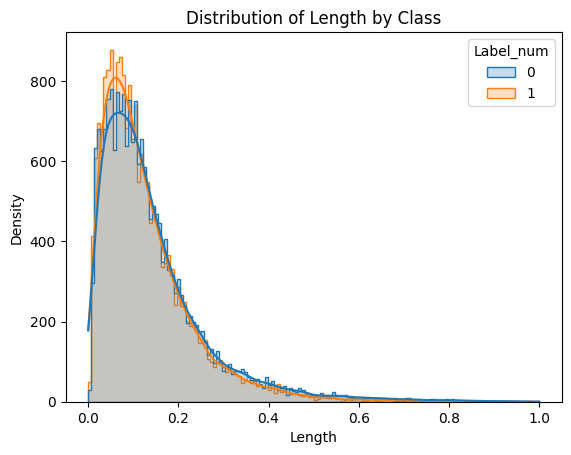

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='Length', hue='Label_num', kde=True, element='step')
plt.title('Distribution of Length by Class')
plt.xlabel('Length')
plt.ylabel('Density')
plt.show()

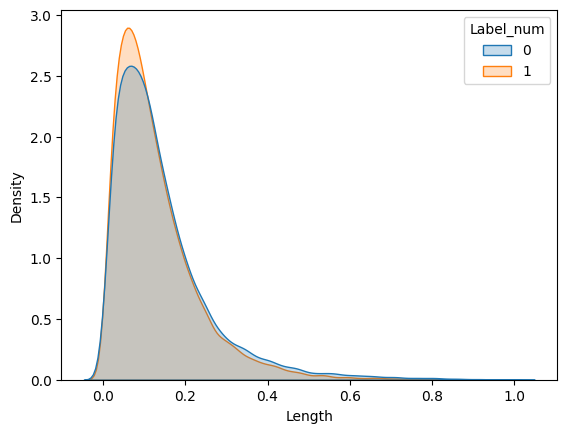

In [ ]:
sns.kdeplot(data=df, x='Length', hue='Label_num', shade=True)
plt.title('KDE of Length by Class')
plt.xlabel('Length')
plt.ylabel('Density')
plt.show()

In [ ]:
df.groupby('Label_num')['Length'].describe()

,count,mean,std,min,25%,50%,75%,max
Label_num,,,,,,,,
0,20654.0,0.142223,0.121560,0.003,0.061,0.110,0.183,1.000
1,20652.0,0.128821,0.104781,0.000,0.057,0.102,0.169,0.923


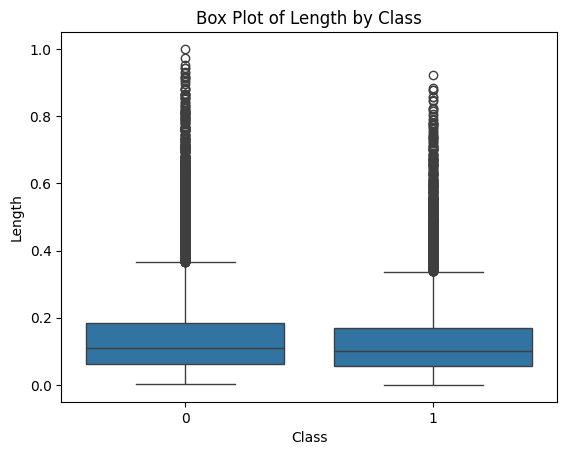

In [ ]:
sns.boxplot(data=df, x='Label_num', y='Length')
plt.title('Box Plot of Length by Class')
plt.xlabel('Class')
plt.ylabel('Length')
plt.show()

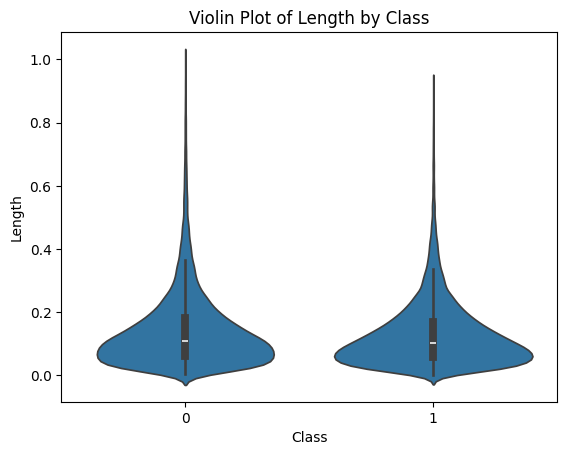

In [ ]:
sns.violinplot(data=df, x='Label_num', y='Length')
plt.title('Violin Plot of Length by Class')
plt.xlabel('Class')
plt.ylabel('Length')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

class_0 = df[df['Label_num'] == 0]['Length']
class_1 = df[df['Label_num'] == 1]['Length']

t_stat, p_value = ttest_ind(class_0, class_1)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 12.001135472288043, P-value: 3.9791257913538154e-33


In [ ]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(class_0, class_1)
print(f"U-statistic: {u_stat}, P-value: {p_value}")

U-statistic: 224924728.0, P-value: 6.862097597840004e-22


In [ ]:
correlation = df['Length'].corr(df['Label_num'])
print(f"Correlation between Length and Class: {correlation}")

Correlation between Length and Class: -0.05894818065404711


### PP Percent

In [ ]:
df = dataset

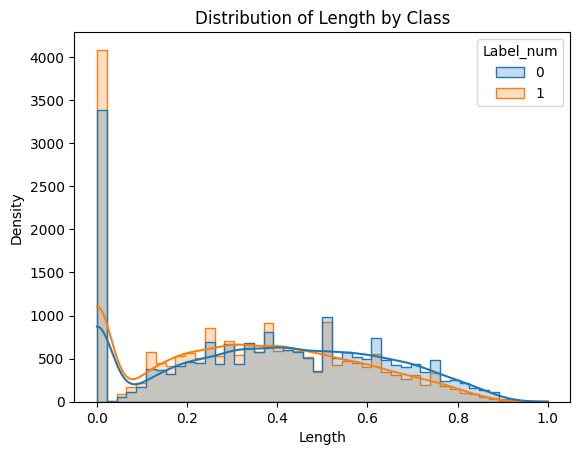

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='PP_Percent', hue='Label_num', kde=True, element='step')
plt.title('Distribution of Length by Class')
plt.xlabel('Length')
plt.ylabel('Density')
plt.show()

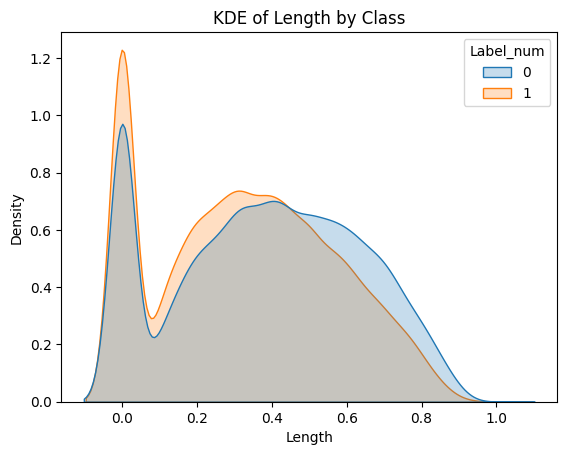

In [ ]:
sns.kdeplot(data=df, x='PP_Percent', hue='Label_num', shade=True)
plt.title('KDE of Length by Class')
plt.xlabel('Length')
plt.ylabel('Density')
plt.show()

In [ ]:
df.groupby('Label_num')['PP_Percent'].describe()

,count,mean,std,min,25%,50%,75%,max
Label_num,,,,,,,,
0,20654.0,0.381183,0.248527,0.0,0.19,0.39,0.58,1.0
1,20652.0,0.327759,0.236115,0.0,0.14,0.33,0.50,1.0


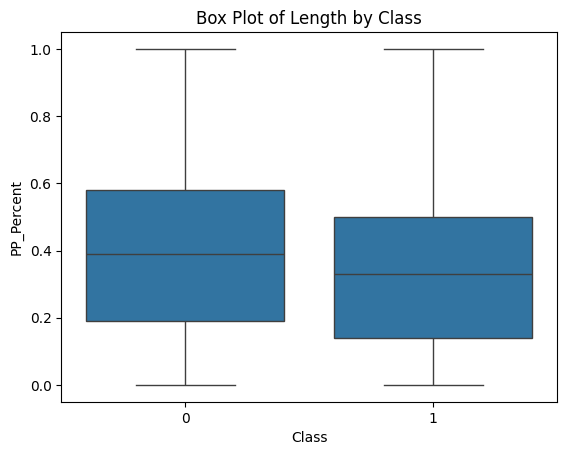

In [ ]:
sns.boxplot(data=df, x='Label_num', y='PP_Percent')
plt.title('Box Plot of Length by Class')
plt.xlabel('Class')
plt.ylabel('PP_Percent')
plt.show()

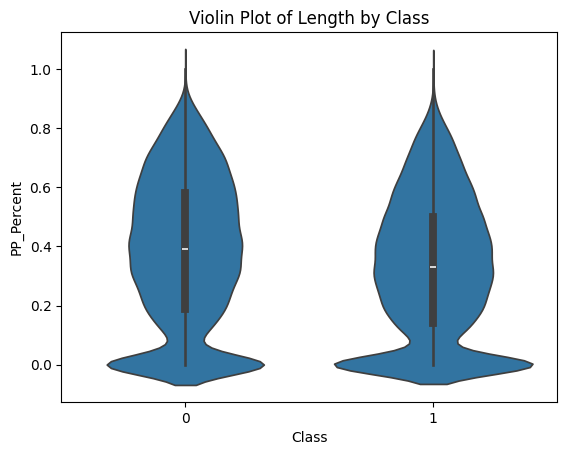

In [ ]:
sns.violinplot(data=df, x='Label_num', y='PP_Percent')
plt.title('Violin Plot of Length by Class')
plt.xlabel('Class')
plt.ylabel('PP_Percent')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

class_0 = df[df['Label_num'] == 0]['PP_Percent']
class_1 = df[df['Label_num'] == 1]['PP_Percent']

t_stat, p_value = ttest_ind(class_0, class_1)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 22.396556584748303, P-value: 1.9377372200292098e-110


In [ ]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(class_0, class_1)
print(f"U-statistic: {u_stat}, P-value: {p_value}")

U-statistic: 239932052.0, P-value: 6.433718195321068e-108


In [ ]:
correlation = df['PP_Percent'].corr(df['Label_num'])
print(f"Correlation between Length and Class: {correlation}")

Correlation between Length and Class: -0.1095377942839012


### PP Percent on Long

In [ ]:
df = Dataset_long

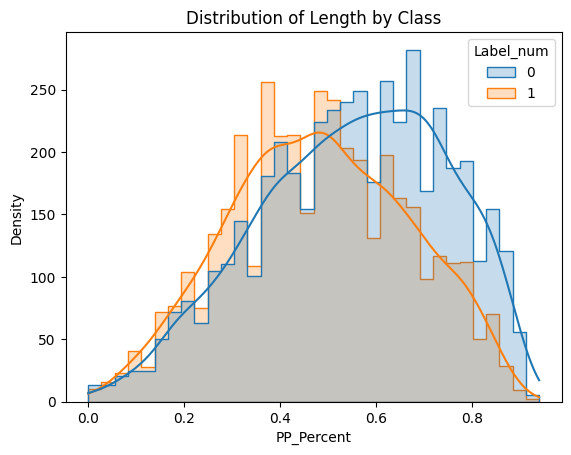

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='PP_Percent', hue='Label_num', kde=True, element='step')
plt.title('Distribution of Length by Class')
plt.xlabel('PP_Percent')
plt.ylabel('Density')
plt.show()

<ipython-input-30-7364969638bd>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='PP_Percent', hue='Label_num', shade=True)


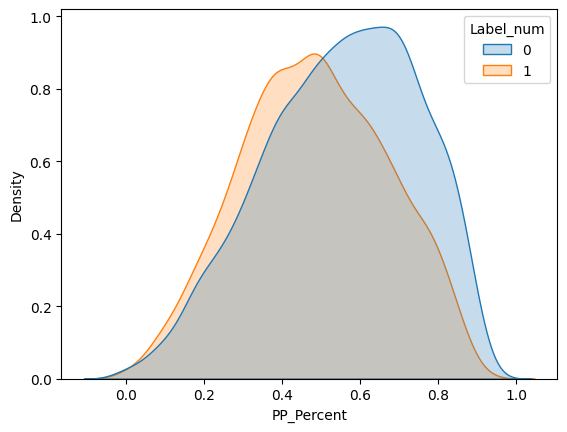

In [ ]:
sns.kdeplot(data=df, x='PP_Percent', hue='Label_num', shade=True)
#plt.title('KDE of Length by Class')
plt.xlabel('PP_Percent')
plt.ylabel('Density')
plt.show()

In [ ]:
df.groupby('Label_num')['PP_Percent'].describe()

,count,mean,std,min,25%,50%,75%,max
Label_num,,,,,,,,
0,4669.0,0.549683,0.196177,0.0,0.41,0.56,0.70,0.93
1,4025.0,0.481734,0.187617,0.0,0.35,0.48,0.62,0.94


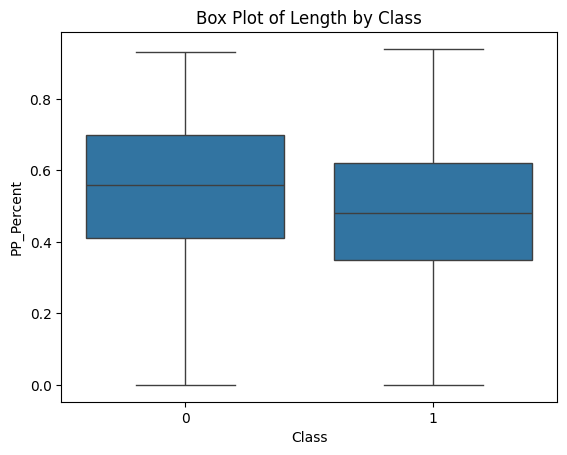

In [ ]:
sns.boxplot(data=df, x='Label_num', y='PP_Percent')
plt.title('Box Plot of Length by Class')
plt.xlabel('Class')
plt.ylabel('PP_Percent')
plt.show()

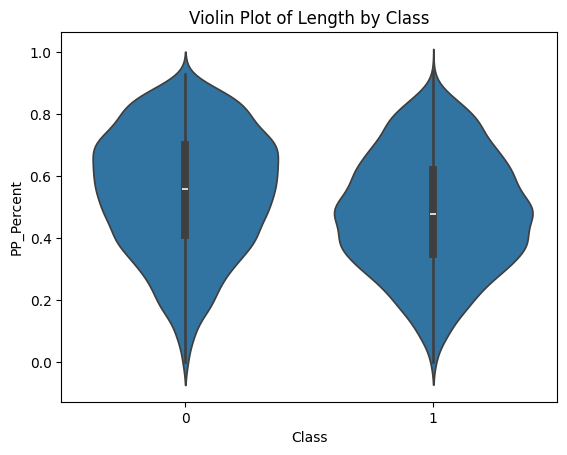

In [ ]:
sns.violinplot(data=df, x='Label_num', y='PP_Percent')
plt.title('Violin Plot of Length by Class')
plt.xlabel('Class')
plt.ylabel('PP_Percent')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

class_0 = df[df['Label_num'] == 0]['PP_Percent']
class_1 = df[df['Label_num'] == 1]['PP_Percent']

t_stat, p_value = ttest_ind(class_0, class_1)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 16.431398011817937, P-value: 9.029348010002492e-60


In [ ]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(class_0, class_1)
print(f"U-statistic: {u_stat}, P-value: {p_value}")

U-statistic: 11327541.5, P-value: 1.5682546527682337e-61


In [ ]:
correlation = df['PP_Percent'].corr(df['Label_num'])
print(f"Correlation between Length and Class: {correlation}")

Correlation between Length and Class: -0.1735690425020457


<ipython-input-51-bded57aa9a67>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset, x='Length', hue='Label_num', shade=True, label='Length')
<ipython-input-51-bded57aa9a67>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Dataset_long, x='PP_Percent', hue='Label_num', shade=True, label='PP_Percent')


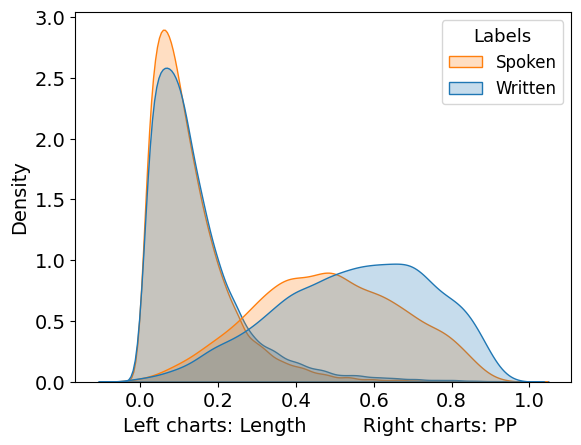

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot KDE for Length
sns.kdeplot(data=dataset, x='Length', hue='Label_num', shade=True, label='Length')

# Plot KDE for PP_Percent on the same plot
sns.kdeplot(data=Dataset_long, x='PP_Percent', hue='Label_num', shade=True, label='PP_Percent')

# Set plot title and labels
#plt.title('KDE of Length and PP_Percent by Class')
plt.xlabel('Left charts: Length         Right charts: PP ',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(title='Labels', labels=['Spoken', 'Written'], fontsize=12, title_fontsize='13')


# Show the plot
plt.show()

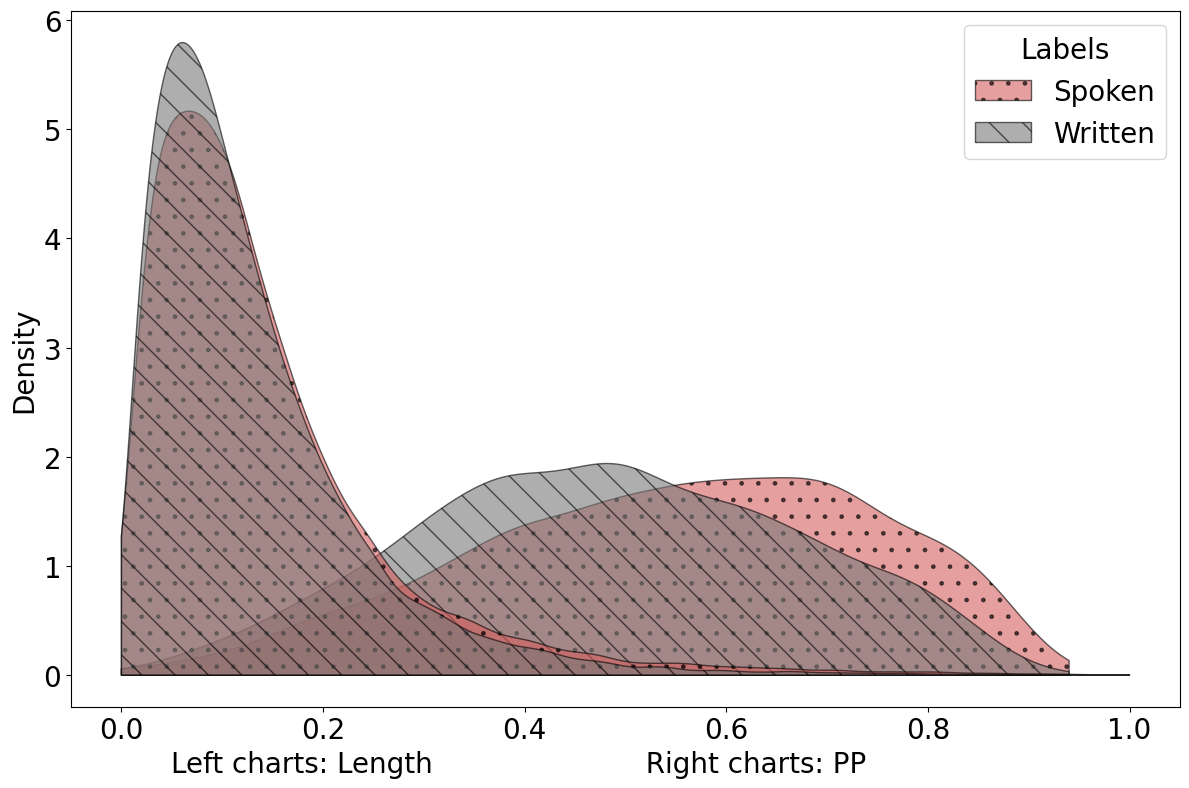

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Define your dataset subsets
length_speaking = dataset[dataset['Label_num'] == 0]['Length']
length_writing = dataset[dataset['Label_num'] == 1]['Length']
pp_speaking = Dataset_long[Dataset_long['Label_num'] == 0]['PP_Percent']
pp_writing = Dataset_long[Dataset_long['Label_num'] == 1]['PP_Percent']

# Create KDE estimations
kde_length_speaking = gaussian_kde(length_speaking)
kde_length_writing = gaussian_kde(length_writing)
kde_pp_speaking = gaussian_kde(pp_speaking)
kde_pp_writing = gaussian_kde(pp_writing)

# Generate the range of x values for the plots
x_pp = np.linspace(min(pp_speaking.min(), pp_writing.min()), max(pp_speaking.max(), pp_writing.max()), 1000)
x_length = np.linspace(min(length_speaking.min(), length_writing.min()), max(length_speaking.max(), length_writing.max()), 1000)

# Calculate the KDE values
y_pp_speaking = kde_pp_speaking(x_pp)
y_pp_writing = kde_pp_writing(x_pp)
y_length_speaking = kde_length_speaking(x_length)
y_length_writing = kde_length_writing(x_length)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot for PP_Percent
plt.fill_between(x_pp, y_pp_speaking, color=sns.color_palette("muted")[3], alpha=0.6, edgecolor='black', hatch='.', label='Spoken - PP')
plt.fill_between(x_pp, y_pp_writing, color=sns.color_palette("muted")[7], alpha=0.6, edgecolor='black', hatch='\\', label='Written - PP')

# Plot for Length
plt.fill_between(x_length, y_length_speaking, color=sns.color_palette("muted")[3], alpha=0.6, edgecolor='black', hatch='.', label='Spoken - Length')
plt.fill_between(x_length, y_length_writing, color=sns.color_palette("muted")[7], alpha=0.6, edgecolor='black', hatch='\\', label='Written - Length')


# Set plot labels
plt.xlabel('Left charts: Length                        Right charts: PP                        ', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Custom legend
plt.legend(title='Labels', labels=['Spoken', 'Written'], fontsize=20, title_fontsize='20')

# Show the plot
plt.tight_layout()
plt.show()


# Creating Dataset

### Preprocessing

In [ ]:
# Downloading the Books and Removing the Gutenberg's Notes:
import requests
import re

URLs = ['https://www.gutenberg.org/cache/epub/13000/pg13000.txt',
        'https://www.gutenberg.org/cache/epub/35861/pg35861.txt',
        'https://www.gutenberg.org/cache/epub/64224/pg64224.txt'
        ]

# pg13000 => The Rough Riders (Theodore Roosevelt)
# pg35861 => A Study in American Politics (Woodrow Wilson)
# pg64224 => American problems (Theodore Roosevelt)

def download_file(url):
    # Downloading:
    response = requests.get(url)
    if response.status_code == 200:

        # Removing Gutenberg's Notes (Before "*** START" and After "*** END"):
        book = response.content.decode('utf-8')
        start_pattern = r"\*\*\* START OF (.*?) \*\*\*"
        end_pattern = "*** END OF"
        start_index = re.search(start_pattern, book).end()
        end_index = book.find(end_pattern)
        truncated_book = book[start_index+1:end_index]

        # Saving to the Current Directory:
        with open(url.split('/')[-1], 'wb') as f:
            f.write(truncated_book.encode())


for url in URLs:
  download_file(url)

del url, URLs

In [ ]:
# Downloading the Speeches:

import urllib.request, json
import pandas as pd

with urllib.request.urlopen('https://millercenter.org/sites/default/files/corpus/presidential-speeches.json') as url:
    data = json.loads(url.read().decode())
    df = pd.DataFrame(data)

del url, data

In [ ]:
df

,title,date,url,president,transcript
0,"April 4, 1917: The Republic Must Awaken",1917-04-04,/the-presidency/presidential-speeches/april-4-...,Warren G. Harding,"My countrymen, the surpassing war of all times..."
1,"March 7, 1964: Press Conference at the White H...",1964-03-07,/the-presidency/presidential-speeches/march-7-...,Lyndon B. Johnson,"THE PRESIDENT. Good afternoon, ladies and gent..."
2,"April 16, 1964: Press Conference at the State ...",1964-04-16,/the-presidency/presidential-speeches/april-16...,Lyndon B. Johnson,"THE PRESIDENT. Ladies and gentlemen, I have co..."
3,"February 29, 1964: Press Conference at the Sta...",1964-02-29,/the-presidency/presidential-speeches/february...,Lyndon B. Johnson,THE PRESIDENT. I take pleasure this morning in...
4,"February 1, 1964: Press Conference",1964-02-01,/the-presidency/presidential-speeches/february...,Lyndon B. Johnson,THE PRESIDENT: This past week the United State...
...,...,...,...,...,...
1045,"January 5, 1956: State of the Union Address",1956-01-05,/the-presidency/presidential-speeches/january-...,Dwight D. Eisenhower,[Read before a joint session by a clerk of the...
1046,"January 10, 1957: State of the Union Address",1957-01-10,/the-presidency/presidential-speeches/january-...,Dwight D. Eisenhower,I appear before the Congress today to report o...
1047,"January 9, 1958: State of the Union Address",1958-01-09,/the-presidency/presidential-speeches/january-...,Dwight D. Eisenhower,"Mr. President, Mr. Speaker, Members of the 85t..."
1048,"January 9, 1959: State of the Union Address",1959-01-09,/the-presidency/presidential-speeches/january-...,Dwight D. Eisenhower,"Mr. President, Mr. Speaker, Members of the 86t..."


In [ ]:
for i in df['president'].unique():
  print(i)

Warren G. Harding
Lyndon B. Johnson
John F. Kennedy
Benjamin Harrison
Franklin D. Roosevelt
Harry S. Truman
Richard M. Nixon
Dwight D. Eisenhower
Ronald Reagan
Andrew Johnson
Gerald Ford
Jimmy Carter
George H. W. Bush
Bill Clinton
George W. Bush
Barack Obama
George Washington
John Adams
Thomas Jefferson
Abraham Lincoln
James Madison
James Monroe
John Quincy Adams
Andrew Jackson
Martin Van Buren
William Harrison
John Tyler
James K. Polk
Zachary Taylor
Millard Fillmore
Franklin Pierce
James Buchanan
Ulysses S. Grant
Rutherford B. Hayes
James A. Garfield
Chester A. Arthur
Grover Cleveland
William McKinley
Theodore Roosevelt
William Taft
Woodrow Wilson
Calvin Coolidge
Herbert Hoover
Donald Trump
Joe Biden


In [ ]:
# Extracting the Speeches from Jason's Structure and Saving them as txt

speech = df['transcript'].str.cat(sep='. ')

with open('Speeches.txt', "w") as f:
    f.write(speech)

del df, speech

In [ ]:
# Reading the Data:

with open("pg13000.txt", "r", encoding='utf-8-sig') as f:
    Book_1 = f.read()

with open("pg35861.txt", "r", encoding='utf-8-sig') as f:
    Book_2 = f.read()

with open("pg64224.txt", "r", encoding='utf-8-sig') as f:
    Book_3 = f.read()

with open("Speeches.txt", "r", encoding='utf-8-sig') as f:
    Speech_1 = f.read()

del f

In [ ]:
!pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 2.4 MB/s eta 0:00:00


In [ ]:
# Reading pdf Books:

# importing required modules
from pypdf import PdfReader

readers = []

# creating a pdf reader object
readers.append(PdfReader('New President Books/The Memoirs of Richard Nixo - Richard M. Nixon.pdf'))
readers.append(PdfReader('New President Books/Six Crises - Richard M. Nixon.pdf'))
readers.append(PdfReader('New President Books/Profiles in Courage - John F. Kennedy.pdf'))
readers.append(PdfReader('New President Books/My Life - Bill Clinton.pdf'))
readers.append(PdfReader('New President Books/Dreams from My Father - Barack Obama.pdf'))
readers.append(PdfReader('New President Books/Crusade in Europe - Dwight D. Eisenhower.pdf'))
readers.append(PdfReader('New President Books/Back to Work - Bill Clinton.pdf'))
#readers.append(PdfReader('New President Books/An American Life An Enhanced e - Ronald Reagan.pdf'))
#readers.append(PdfReader('New President Books/A Promised Land - Barack Obama.pdf'))
#readers.append(PdfReader('New President Books/A Nation of Immigrants - John F. Kennedy.pdf'))

In [ ]:
# getting a specific page from the pdf file

Books = []

for reader in readers:
    text = ""
    for j in range(len(reader.pages)):
      page = reader.pages[j]
      text = text + (page.extract_text()) + "\n"

    Books.append(text)


In [ ]:
# Removing intrudoctions of Books:

Books[0] = Books[0][Books[0].find("I was born in a house"):]                           # The Memoirs of Richard Nixo - Richard M. Nixon.pdf
Books[1] = Books[1][Books[1].find("If I had known the effort that"):]                  # Six Crises - Richard M. Nixon.pdf
Books[2] = Books[2][Books[2].find("This is a book about that most admirable"):]        # Profiles in Courage - John F. Kennedy.pdf
Books[3] = Books[3][Books[3].find("When I was a young man just out of law school"):]   # My Life - Bill Clinton.pdf
Books[4] = Books[4][Books[4].find("I ORIGINALLY INTENDED A VERY different book"):]     # Dreams from My Father - Barack Obama.pdf
Books[5] = Books[5][Books[5].find("IN THE ALLIED HEADQUARTERS AT reims"):]             # Crusade in Europe - Dwight D. Eisenhower.pdf
Books[6] = Books[6][Books[6].find("I DECIDED TO WRITE THIS BOOK after the"):]          # Back to Work - Bill Clinton.pdf

In [ ]:
# Removing last pages: MAPS AND ILLUSTRATIONS

Books[1] = Books[1][:Books[1].find("Appendix")]                         # Six Crises - Richard M. Nixon.pdf
Books[2] = Books[2][:Books[2].find("Bibliography")]                     # Profiles in Courage - John F. Kennedy.pdf
Books[4] = Books[4][:Books[4].find("Also by Barack Obama")]             # Dreams from My Father - Barack Obama.pdf
Books[5] = Books[5][:Books[5].find("MAPS AND ILLUSTRATIONS")]           # Crusade in Europe - Dwight D. Eisenhower.pdf

In [ ]:
# Removing the multi-space from the text. Also, the chapter titles have been removed manually:

data = {
         'Spoken':   [Speech_1],
         'Written':  [Book_1, Book_2, Book_3]
        }

data['Written'].extend(Books)


for key in data.keys():
    for i in range(len(data[key])):
        data[key][i] = data[key][i].replace("\n", " ")
        data[key][i] = data[key][i].replace("    ", " ")
        data[key][i] = data[key][i].replace("   ", " ")
        data[key][i] = data[key][i].replace("  ", " ")

del Speech_1
del Book_1, Book_2, Book_3, Books
del i, key

In [ ]:
#Saving the Dataset

import json

# create json object from dictionary
data_json = json.dumps(data)

# open file for writing, "w"
f = open("data(Spoken,Written).json","w")

# write json object to file
f.write(data_json)

# close file
f.close()

In [ ]:
# Sentence Extraction:

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Splitting the text to sentences:

sentences =  {
              'Spoken':  [],
              'Written': []
             }

for key in data.keys():
    for i in range(len(data[key])):
        sentences[key].extend(nltk.sent_tokenize(data[key][i]))

del i, key, data

In [ ]:
# Number of Sentences before Truncation:

for key in sentences:
  print('{0: <7}'.format(key),' = ',len(sentences[key]))

del key

Spoken   =  165579
Written  =  21812


In [ ]:
# Creating dataframe with sentences and two additional columns, the length of the sentences (Number of characters), and the number of words in each sentence:

import pandas as pd

for key in sentences.keys():
    sentences_len = []
    sentences_words = []
    for sentence in sentences[key]:
        sentences_len.append(len(sentence))
        sentences_words.append(len(sentence.split()))

    dic = {"Sentence":sentences[key],"Length":sentences_len, "Words": sentences_words}
    exec(f'sentences_{key} = pd.DataFrame(dic)')

del key, dic, sentence, sentences, sentences_len, sentences_words

In [ ]:
# Extracted Spoken Sentences:

sentences_Spoken

,Sentence,Length,Words
0,"My countrymen, the surpassing war of all times...",133,23
1,The Republic must awaken.,25,4
2,The people must understand.,27,4
3,Our safety lies in full realization the fate o...,140,26
4,Primarily the American Republic has entered th...,86,14
...,...,...,...
165574,"""Such slippery slogans make more difficult the...",181,27
165575,"So doing, we must use language to enlighten th...",1120,191
165576,"241, 86th Cong., 2d sess.).",27,5
165577,The Address as reported from the floor appears...,99,17


In [ ]:
# Extracted Written Sentences:

sentences_Written

,Sentence,Length,Words
0,Produced by Dagny Wilson THE ROUGH RIDERS ...,368,63
1,"While my party was in opposition, I had preach...",199,36
2,"Now that my party had come to power, I felt it...",278,58
3,"Meanwhile, there was any amount of work at han...",104,20
4,"Naturally, when one is intensely interested in...",140,23
...,...,...,...
21807,"I couldn’t win the Tea Party over, of course, ...",107,19
21808,We balanced the budget with a balance d plan: ...,1325,201
21809,"Of course, speeches by a former president don’...",150,24
21810,"The big defeat didn’t surprise me, but it did ...",256,43


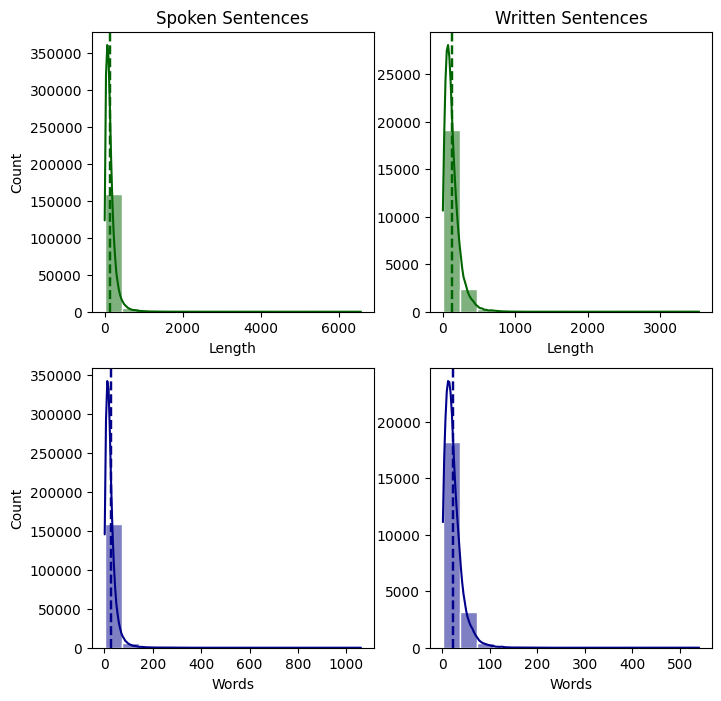

In [ ]:
# Histograms on all Sentences in the Dataset:

import statistics
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

sns.set(style="darkgrid")


# First Row (Length):
sns.histplot(data=sentences_Spoken["Length"], legend=False, color="darkgreen", kde=True, bins=15, ax = axs[0,0]).set(title='Spoken Sentences')
axs[0,0].axvline(x=statistics.mean(sentences_Spoken["Length"]), color='darkgreen', ls='--', lw=1.75)

sns.histplot(data=sentences_Written["Length"], legend=False, color="darkgreen", kde=True, bins=15, ax = axs[0,1]).set(title='Written Sentences')
axs[0,1].axvline(x=statistics.mean(sentences_Written["Length"]), color='darkgreen', ls='--', lw=1.75)
axs[0,1].set_ylabel("")


# Second Row (Words):
sns.histplot(data=sentences_Spoken["Words"], legend=False, color="darkblue", kde=True, bins=15, ax = axs[1,0])
axs[1,0].axvline(x=statistics.mean(sentences_Spoken["Words"]), color='darkblue', ls='--', lw=1.75)

sns.histplot(data=sentences_Written["Words"], legend=False, color="darkblue", kde=True, bins=15, ax = axs[1,1])
axs[1,1].axvline(x=statistics.mean(sentences_Written["Words"]), color='darkblue', ls='--', lw=1.75)
axs[1,1].set_ylabel("")


plt.show()

In [ ]:
# Example of Shortest and Longest Spoken Sentences:
print("Spoken:")
print("Shortest Sentense:   index =", '{0: <6}'.format(sentences_Spoken["Words"].idxmin()), " length =", '{0: <6}'.format(min(sentences_Spoken["Words"])), "--->  ",sentences_Spoken.iloc[sentences_Spoken["Words"].idxmin()]["Sentence"])
print("Longest Sentense:    index =", '{0: <6}'.format(sentences_Spoken["Words"].idxmax()), " length =", '{0: <6}'.format(max(sentences_Spoken["Words"])), "--->  ",sentences_Spoken.iloc[sentences_Spoken["Words"].idxmax()]["Sentence"])

# Example of Shortest and Longest Written Sentences:
print("\nWritten:")
print("Shortest Sentense:   index =", '{0: <6}'.format(sentences_Written["Words"].idxmin()), " length =", '{0: <6}'.format(min(sentences_Written["Words"])), "--->  ",sentences_Written.iloc[sentences_Written["Words"].idxmin()]["Sentence"])
print("Longest Sentense:    index =", '{0: <6}'.format(sentences_Written["Words"].idxmax()), " length =", '{0: <6}'.format(max(sentences_Written["Words"])), "--->  ",sentences_Written.iloc[sentences_Written["Words"].idxmax()]["Sentence"])

Spoken:
Shortest Sentense:   index = 17      length = 1      --->   .
Longest Sentense:    index = 113233  length = 1060   --->   And whereas these resolutions, though not joint or concurrent in form, are substantially identical, and as such have hitherto been and yet are regarded as having expressed the sense of Congress upon the subject to which they relate; and Whereas the President of the United States, by proclamation of the 13th of June, 1865, declared that the insurrection in the State of Tennessee had been suppressed, and that the authority of the United States therein was undisputed, and that such United States officers as had been duly commissioned were in the undisturbed exercise of their official functions; and Whereas the President of the United States, by further proclamation, issued on the 2d day of April, 1866, did promulgate and declare that there no longer existed any armed resistance of misguided citizens or others to the authority of the United States in any or in a

In [ ]:
# Removing very long and very short sentenses:

sentences_Spoken_short  = sentences_Spoken  [(sentences_Spoken["Words"]  >2) & (sentences_Spoken["Words"]  <= 150)]
sentences_Written_short = sentences_Written [(sentences_Written["Words"] >2) & (sentences_Written["Words"] <= 150)]


In [ ]:
# Resetting the dataframe indexes:

sentences_Spoken_short  = sentences_Spoken_short.reset_index(drop=True)
sentences_Written_short = sentences_Written_short.reset_index(drop=True)

In [ ]:
del sentences_Spoken
del sentences_Written

### Histograms

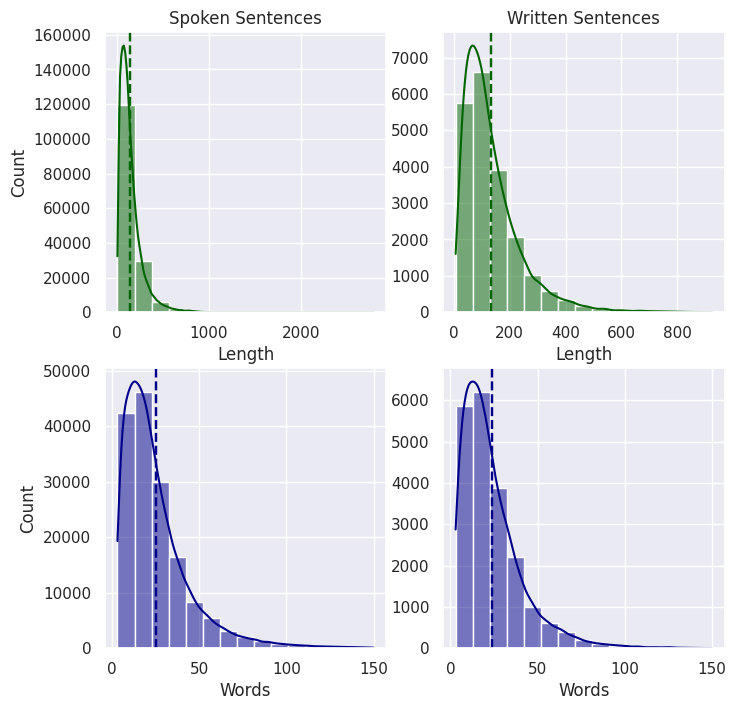

In [ ]:
# Histograms on all Truncated Sentences in the Dataset:

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

sns.set(style="darkgrid")


# First Row (Length):
sns.histplot(data=sentences_Spoken_short["Length"], legend=False, color="darkgreen", kde=True, bins=15, ax = axs[0,0]).set(title='Spoken Sentences')
axs[0,0].axvline(x=statistics.mean(sentences_Spoken_short["Length"]), color='darkgreen', ls='--', lw=1.75)

sns.histplot(data=sentences_Written_short["Length"], legend=False, color="darkgreen", kde=True, bins=15, ax = axs[0,1]).set(title='Written Sentences')
axs[0,1].axvline(x=statistics.mean(sentences_Written_short["Length"]), color='darkgreen', ls='--', lw=1.75)
axs[0,1].set_ylabel("")


# Second Row (Words):
sns.histplot(data=sentences_Spoken_short["Words"], legend=False, color="darkblue", kde=True, bins=15, ax = axs[1,0])
axs[1,0].axvline(x=statistics.mean(sentences_Spoken_short["Words"]), color='darkblue', ls='--', lw=1.75)

sns.histplot(data=sentences_Written_short["Words"], legend=False, color="darkblue", kde=True, bins=15, ax = axs[1,1])
axs[1,1].axvline(x=statistics.mean(sentences_Written_short["Words"]), color='darkblue', ls='--', lw=1.75)
axs[1,1].set_ylabel("")

plt.show()

In [ ]:
# Example of Shortest and Longest Spoken Sentences:
print("Spoken:")
print("Shortest Sentense:   index =", '{0: <6}'.format(sentences_Spoken_short["Words"].idxmin()), " length =", '{0: <6}'.format(min(sentences_Spoken_short["Words"])), "--->  ",sentences_Spoken_short.iloc[sentences_Spoken_short["Words"].idxmin()]["Sentence"])
print("Longest Sentense:    index =", '{0: <6}'.format(sentences_Spoken_short["Words"].idxmax()), " length =", '{0: <6}'.format(max(sentences_Spoken_short["Words"])), "--->  ",sentences_Spoken_short.iloc[sentences_Spoken_short["Words"].idxmax()]["Sentence"])

# Example of Shortest and Longest Written Sentences:
print("\nWritten:")
print("Shortest Sentense:   index =", '{0: <6}'.format(sentences_Written_short["Words"].idxmin()), " length =", '{0: <6}'.format(min(sentences_Written_short["Words"])), "--->  ",sentences_Written_short.iloc[sentences_Written_short["Words"].idxmin()]["Sentence"])
print("Longest Sentense:    index =", '{0: <6}'.format(sentences_Written_short["Words"].idxmax()), " length =", '{0: <6}'.format(max(sentences_Written_short["Words"])), "--->  ",sentences_Written_short.iloc[sentences_Written_short["Words"].idxmax()]["Sentence"])

Spoken:
Shortest Sentense:   index = 597     length = 3      --->   Is that true?
Longest Sentense:    index = 68389   length = 150    --->   It will be worthy at the same time of their lust and provident care to make such further alterations in the laws as will more especially protect and foster the several branches of manufacture which have been recently instituted or extended by the laudable exertions of our citizens.Under the existing aspect of our affairs I have thought it not inconsistent with a just precaution to have the gunboats, with the exception of those at New Orleans, placed in a situation incurring no expense beyond that requisite for their preservation and conveniency for future service, and to have the crews of those at New Orleans reduced to the number required for their navigation and safety.I have thought also that our citizens detached in quotas of militia amounting to 100,000 under the act of March, 1808, might not improperly be relieved from the state in which th

In [ ]:
del axs, fig

### Dataset

In [ ]:
# Labeling the Sentences:

sentences_Spoken_short["Label"]       = "Spoken"
sentences_Spoken_short["Label_num"]   = 0

sentences_Written_short["Label"]      = "Written"
sentences_Written_short["Label_num"]  = 1

In [ ]:
# Merging All Three Dataframes:

#del Dataset

Dataset = pd.concat([sentences_Spoken_short, sentences_Written_short], ignore_index = True)
Dataset.reset_index(drop=True)

,Sentence,Length,Words,Label,Label_num
0,"My countrymen, the surpassing war of all times...",133,23,Spoken,0
1,The Republic must awaken.,25,4,Spoken,0
2,The people must understand.,27,4,Spoken,0
3,Our safety lies in full realization the fate o...,140,26,Spoken,0
4,Primarily the American Republic has entered th...,86,14,Spoken,0
...,...,...,...,...,...
177873,I also tried to get a few laughs to break the ...,172,33,Written,1
177874,"After all, during my administration we had fou...",706,117,Written,1
177875,"I couldn’t win the Tea Party over, of course, ...",107,19,Written,1
177876,"Of course, speeches by a former president don’...",150,24,Written,1


In [ ]:
# Shuffleing the Dataset:

from sklearn.utils import shuffle

Dataset = shuffle(Dataset)
Dataset.reset_index(drop=True, inplace=True)

In [ ]:
Dataset

,Sentence,Length,Words,Label,Label_num
0,And He cares more about whether I’m about the ...,169,30,Written,1
1,The rapid multiplication of questions affectin...,404,61,Spoken,0
2,It was then that I issued the proclamation pro...,187,30,Spoken,0
3,My most solemn duty is to protect this Nation ...,103,18,Spoken,0
4,"I believe that when protection becomes, not a ...",183,28,Written,1
...,...,...,...,...,...
177873,That deficit is ruining the long-term hopes fo...,61,10,Spoken,0
177874,Such conduct is just as reprehensible in one c...,163,29,Spoken,0
177875,In order that the country should not be depriv...,298,52,Spoken,0
177876,We’re just not going to approve it.,35,7,Spoken,0


In [ ]:
Dataset['Label'].value_counts()

,count
Label,
Spoken,157224
Written,20654


In [ ]:
#Saving the Dataset

Dataset.to_pickle("Dataset (Spoken and Written)_08.19.2024.pkl")

In [ ]:
del sentences_Spoken_short
del sentences_Written_short

## Balenced Dataset

In [ ]:
display(Dataset.head(5))

print("\n")
print("================")
#Number of samples in each group:

num_samples = Dataset['Label'].value_counts()
for key,value in num_samples.items():
    print("{0: <8}".format(key), value)

print("\nSum = ", num_samples.sum())
print("================")

del key,value,num_samples

,Sentence,Length,Words,Label,Label_num
0,And He cares more about whether I’m about the ...,169,30,Written,1
1,The rapid multiplication of questions affectin...,404,61,Spoken,0
2,It was then that I issued the proclamation pro...,187,30,Spoken,0
3,My most solemn duty is to protect this Nation ...,103,18,Spoken,0
4,"I believe that when protection becomes, not a ...",183,28,Written,1




Spoken   157224
Written  20654

Sum =  177878


In [ ]:
# Separate the two classes:
Dataset_s = Dataset[Dataset['Label_num'] == 0]
Dataset_w = Dataset[Dataset['Label_num'] == 1]

In [ ]:

# Downsampling the bigger classes and storing the sampled indices:
sampled_indices = Dataset_s.sample(len(Dataset_w)).index

# Downsampling the bigger classes:
Dataset_s = Dataset_s.loc[sampled_indices]

In [ ]:
# Merging Classes:
Dataset_balanced = pd.concat([Dataset_s, Dataset_w])

In [ ]:
#Saving:
import pickle

Dataset_s.to_pickle("Dataset (Spoken)_08.19.2024.pkl")
Dataset_w.to_pickle("Dataset (Written)_08.19.2024.pkl")
with open('sampled_Spoken_indices_08.19.2024.pkl', 'wb') as f:
    pickle.dump(sampled_indices.to_list(), f)

In [ ]:
# Shuffeling:
Dataset_balanced = Dataset_balanced.sample(frac=1).reset_index(drop=True)

In [ ]:
display(Dataset_balanced.head(5))

print("\n")
print("================")
#Number of sample in each group:

num_samples = Dataset_balanced['Label'].value_counts()
for key,value in num_samples.items():
    print("{0: <8}".format(key), value)

print("\nSum = ", num_samples.sum())
print("================")

del key,value,num_samples

,Sentence,Length,Words,Label,Label_num
0,Convinced that the treaty was a plot hatched b...,338,47,Written,1
1,without decent and refined language.,36,5,Written,1
2,Only after I had hung up and she turned toward...,235,46,Written,1
3,"I sensed, though, that at some stage—maybe whe...",428,79,Written,1
4,"Sundry treaties have been negotiated, which wi...",118,19,Spoken,0




Written  20654
Spoken   20654

Sum =  41308


In [ ]:
#Saving the Dataset

Dataset_balanced.to_pickle("Dataset (Spoken and Written)_08.19.2024_balanced.pkl")

## Running CoreNLP

In [ ]:
# https://colab.research.google.com/github/stanfordnlp/stanza/blob/master/demo/Stanza_CoreNLP_Interface.ipynb#scrollTo=WP4Dz6PIJHeL

In [ ]:
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.1/990.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 23.4 MB/s eta 0:00:00


In [ ]:
import stanza

In [ ]:
rm -rf corenlp

In [ ]:
# Download the Stanford CoreNLP package with Stanza's installation command
corenlp_dir = './corenlp'
stanza.install_corenlp(dir=corenlp_dir)

INFO:stanza:Installing CoreNLP package into ./corenlp


INFO:stanza:Downloaded file to ./corenlp/corenlp.zip


In [ ]:
# Set the CORENLP_HOME environment variable to point to the installation location
import os
os.environ["CORENLP_HOME"] = corenlp_dir

In [ ]:
!ls $CORENLP_HOME

build.xml				  LIBRARY-LICENSES
corenlp.sh				  LICENSE.txt
CoreNLP-to-HTML.xsl			  Makefile
ejml-core-0.39.jar			  patterns
ejml-core-0.39-sources.jar		  pom-java-11.xml
ejml-ddense-0.39.jar			  pom-java-17.xml
ejml-ddense-0.39-sources.jar		  pom.xml
ejml-simple-0.39.jar			  protobuf-java-3.19.6.jar
ejml-simple-0.39-sources.jar		  README.txt
input.txt				  RESOURCE-LICENSES
input.txt.out				  sample-project-pom.xml
input.txt.xml				  SemgrexDemo.java
istack-commons-runtime-3.0.7.jar	  ShiftReduceDemo.java
istack-commons-runtime-3.0.7-sources.jar  slf4j-api.jar
javax.activation-api-1.2.0.jar		  slf4j-simple.jar
javax.activation-api-1.2.0-sources.jar	  stanford-corenlp-4.5.7.jar
javax.json-api-1.0-sources.jar		  stanford-corenlp-4.5.7-javadoc.jar
javax.json.jar				  stanford-corenlp-4.5.7-models.jar
jaxb-api-2.4.0-b180830.0359.jar		  stanford-corenlp-4.5.7-sources.jar
jaxb-api-2.4.0-b180830.0359-sources.jar   StanfordCoreNlpDemo.java
jaxb-impl-2.4.0-b180830.0438.jar	  StanfordDependenci

In [ ]:
!export CORENLP_HOME=path_to_corenlp_dir

In [ ]:
# Import client module
from stanza.server import CoreNLPClient

In [ ]:
# Construct a CoreNLPClient with some basic annotators, a memory allocation of 4GB, and port number 9001
client = CoreNLPClient(
    timeout=70000,
    #annotators=['tokenize','ssplit', 'pos', 'lemma', 'ner'],
    annotators=['tokenize','ssplit','pos','lemma','ner', 'parse', 'depparse','coref'],
    memory='4G',
    endpoint='http://localhost:9001',
    be_quiet=True)
print(client)

INFO:stanza:Writing properties to tmp file: corenlp_server-25227980d63143e4.props


In [ ]:
# Start the background server and wait for some time
# Note that in practice this is totally optional, as by default the server will be started when the first annotation is performed
client.start()
import time; time.sleep(10)

INFO:stanza:Starting server with command: java -Xmx4G -cp ./corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9001 -timeout 70000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-25227980d63143e4.props -annotators tokenize,ssplit,pos,lemma,ner,parse,depparse,coref -preload -outputFormat serialized


In [ ]:
# Print background processes and look for java
!ps -o pid,cmd | grep java

## Example of CoreNLP

In [ ]:
# Annotate some text
text = "I am Mosab"
document = client.annotate(text)
print(type(document))

<class 'CoreNLP_pb2.Document'>


In [ ]:
print(text)
print([t.pos for t in document.sentence[0].token])
del text

I am Mosab
['PRP', 'VBP', 'NNP']


In [ ]:
document.sentence[0].parseTree

child {
  child {
    child {
      child {
        value: "I"
      }
      value: "PRP"
      score: -1.9594900608062744
    }
    value: "NP"
    score: -2.8210573196411133
  }
  child {
    child {
      child {
        value: "am"
      }
      value: "VBP"
      score: -2.893768548965454
    }
    child {
      child {
        child {
          value: "Mosab"
        }
        value: "NNP"
        score: -12.50869083404541
      }
      value: "NP"
      score: -15.847437858581543
    }
    value: "VP"
    score: -24.91014862060547
  }
  value: "S"
  score: -32.429874420166016
}
value: "ROOT"
score: -32.601253509521484

In [ ]:
# Iterate over all tokens in all sentences, and print out the word, lemma, pos and ner tags
print("{:12s}\t{:12s}\t{:6s}\t{}".format("Word", "Lemma", "POS", "NER"))

for i, sent in enumerate(document.sentence):
    print("[Sentence {}]".format(i+1))
    for t in sent.token:
        print("{:12s}\t{:12s}\t{:6s}\t{}".format(t.word, t.lemma, t.pos, t.ner))
    print("")

del i,t

Word        	Lemma       	POS   	NER
[Sentence 1]
I           	I           	PRP   	O
am          	be          	VBP   	O
Mosab       	Mosab       	NNP   	PERSON



In [ ]:
# Iterate over all detected entity mentions
print("{:30s}\t{}".format("Mention", "Type"))

for sent in document.sentence:
    for m in sent.mentions:
        print("{:30s}\t{}".format(m.entityMentionText, m.entityType))

del m, sent

Mention                       	Type
Mosab                         	PERSON


In [ ]:
!pip install graphviz pydot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 811.7 kB/s eta 0:00:00


In [ ]:
import re
import graphviz
from graphviz import Digraph

def build_tree(data):
    """
    Build a tree from the string representation.
    """
    # Split the data into lines
    lines = data.split('\n')

    # Create a root node
    tree = {"children": []}
    current_node = tree
    stack = []

    # Regex pattern to identify node attributes
    pattern = re.compile(r'(value|score): "?(.*?)"?\s*$')

    for line in lines:
        line = line.strip()
        if line.startswith("child {"):
            # Start a new child node
            new_node = {"children": []}
            if current_node is not None:
                current_node["children"].append(new_node)
            stack.append(current_node)
            current_node = new_node
        elif line == "}":
            # End of the current node, pop from stack
            current_node = stack.pop()
        else:
            # Extract attributes
            match = pattern.search(line)
            if match:
                current_node[match.group(1)] = match.group(2)

    return tree["children"][0]

def visualize_tree(node, graph=None, parent_id=None):
    """
    Visualize the tree using Graphviz.
    """
    if graph is None:
        graph = Digraph(comment='Tree Visualization')

    # Create a unique node id
    node_id = str(id(node))

    # Create label for the node
    label = node.get("value", "")
    graph.node(node_id, label)

    # Link to the parent node
    if parent_id is not None:
        graph.edge(parent_id, node_id)

    # Recurse for children
    for child in node.get("children", []):
        visualize_tree(child, graph, node_id)

    return graph

# Building and visualizing the tree
data = str(document.sentence[0].parseTree)
#data = str(Dataset_2['parstree'][0])
tree = build_tree(data)
graph = visualize_tree(tree)

# Save and display the graph
graph_file = '/mnt/data/tree_visualization'
graph.render(graph_file, format='png', cleanup=True)
graph_file + '.png'

#print(Dataset_2['parstree'][0])
print(document.sentence[0].parseTree)

In [ ]:
from PIL import Image
image = Image.open('/mnt/data/tree_visualization.png')
display(image)

## CoreNLP on Dataset

In [ ]:
len(Dataset_balanced)

41308

In [ ]:
text_sentences = Dataset_balanced[['Sentence']]['Sentence'].tolist()

text_sentences_pared = []
index_of_error = []

print("Total number of Samples:", len(Dataset_balanced))

for i in range(len(text_sentences)):
  try:
    if i % 1000 == 0:
        print(i)
    document = client.annotate(text_sentences[i])
    text_sentences_pared.append(document)
  except:
    index_of_error.append(i)
    text_sentences_pared.append(i)



Total number of Samples: 41308
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000


In [ ]:
# Removing errors:

print(index_of_error)

[19658, 35544]


In [ ]:
# Remove from Dataset:
Dataset_balanced = Dataset_balanced.drop(index=[19658, 35544])
Dataset_balanced.reset_index(drop=True, inplace=True)

In [ ]:
# Remove the elements with biger index first:
del text_sentences_pared[35544]
del text_sentences_pared[19658]

In [ ]:
# Adding CoreNLP to Dataset:

for i in range(len(Dataset_balanced)):
    Dataset_balanced.loc[i, 'parse_tree'] = str(text_sentences_pared[i].sentence[0].parseTree)
    Dataset_balanced.loc[i, 'pos']        = str([t.pos for t in text_sentences_pared[i].sentence[0].token])
    Dataset_balanced.loc[i, 'dependency'] = text_sentences_pared[i].sentence[0].enhancedPlusPlusDependencies.edge

In [ ]:
Dataset_balanced

,Sentence,Length,Words,Label,Label_num,parse_tree,pos,dependency
0,Convinced that the treaty was a plot hatched b...,338,47,Written,1,child {\n child {\n child {\n child {...,"['JJ', 'IN', 'DT', 'NN', 'VBD', 'DT', 'NN', 'V...","[source: 46\ntarget: 1\ndep: ""nsubj""\nisExtra:..."
1,without decent and refined language.,36,5,Written,1,child {\n child {\n child {\n value: ...,"['IN', 'JJ', 'CC', 'JJ', 'NN', '.']","[source: 5\ntarget: 1\ndep: ""case""\nisExtra: f..."
2,Only after I had hung up and she turned toward...,235,46,Written,1,child {\n child {\n child {\n child {...,"['RB', 'IN', 'PRP', 'VBD', 'VBN', 'RP', 'CC', ...","[source: 5\ntarget: 1\ndep: ""advmod""\nisExtra:..."
3,"I sensed, though, that at some stage—maybe whe...",428,79,Written,1,child {\n child {\n child {\n child {...,"['PRP', 'VBD', ',', 'RB', ',', 'IN', 'IN', 'DT...","[source: 2\ntarget: 1\ndep: ""nsubj""\nisExtra: ..."
4,"Sundry treaties have been negotiated, which wi...",118,19,Spoken,0,child {\n child {\n child {\n child {...,"['JJ', 'NNS', 'VBP', 'VBN', 'VBN', ',', 'WDT',...","[source: 2\ntarget: 1\ndep: ""amod""\nisExtra: f..."
...,...,...,...,...,...,...,...,...
41301,The other members of this committee will be Mr...,164,28,Spoken,0,child {\n child {\n child {\n child {...,"['DT', 'JJ', 'NNS', 'IN', 'DT', 'NN', 'MD', 'V...","[source: 3\ntarget: 1\ndep: ""det""\nisExtra: fa..."
41302,Now the first question is from Mr. McGee and i...,68,13,Spoken,0,child {\n child {\n child {\n child {...,"['RB', 'DT', 'JJ', 'NN', 'VBZ', 'IN', 'NNP', '...","[source: 8\ntarget: 1\ndep: ""advmod""\nisExtra:..."
41303,Synthetic-fabric “drip-dry” shirts were availa...,245,35,Written,1,child {\n child {\n child {\n child {...,"['JJ', 'HYPH', 'NN', '``', 'NN', 'HYPH', 'JJ',...","[source: 3\ntarget: 1\ndep: ""amod""\nisExtra: f..."
41304,"We are tougher than the times we live in, and ...",88,18,Spoken,0,child {\n child {\n child {\n child {...,"['PRP', 'VBP', 'JJR', 'IN', 'DT', 'NNS', 'PRP'...","[source: 3\ntarget: 1\ndep: ""nsubj""\nisExtra: ..."


In [ ]:
'''
Dataset_balanced.loc[:,'dependency'] = Dataset_balanced.loc[:, 'dependency'].astype(str)
'''

In [ ]:
'''
Dataset_balanced.to_pickle("Dataset (Spoken and Written)_08.19.2024_balanced.pkl")
'''

In [ ]:
Dataset = Dataset_balanced

# Features (Paper 1)

## Part of Speech

In [ ]:
for i in range(len(Dataset)):

    tokens = [t.pos for t in text_sentences_pared[i].sentence[0].token]

    Dataset.at[i, 'verb_count']   = sum(1 for t in tokens if t.startswith('V'))
    Dataset.at[i, 'adverb_count'] = sum(1 for t in tokens if t.startswith('RB'))
    Dataset.at[i, 'noun_count']   = sum(1 for t in tokens if t.startswith('N'))
    Dataset.at[i, 'coord_count']  = sum(1 for t in tokens if t.startswith('CC'))
    Dataset.at[i, 'subord_count'] = sum(1 for t in tokens if t.startswith('IN'))

Dataset['verb_percent']        =  round(Dataset['verb_count']/Dataset['Words'], 2)
Dataset['adverb_percent']      =  round(Dataset['adverb_count']/Dataset['Words'], 2)
Dataset['noun_percent']        =  round(Dataset['noun_count']/Dataset['Words'], 2)
Dataset['coord_percent']  =  round(Dataset['coord_count']/Dataset['Words'], 2)
Dataset['subord_percent'] =  round(Dataset['subord_count']/Dataset['Words'], 2)

del i, tokens

In [ ]:
#Dataset.to_pickle("Dataset (Spoken and Written)_08.19.2024_balanced.pkl")

## Path and Depth

In [ ]:
# Calculate the longest path between two leaves in the tree.

def longest_path(node):

    if not node.get("children"):
        # Leaf node, no children
        return 0, 0

    max_depth = 0
    second_max_depth = 0
    max_path = 0

    for child in node["children"]:
        path, depth = longest_path(child)
        if depth > max_depth:
            second_max_depth = max_depth
            max_depth = depth
        elif depth > second_max_depth:
            second_max_depth = depth

        max_path = max(max_path, path)

    # Longest path through this node
    longest_through_root = max_depth + second_max_depth + 2

    return max(max_path, longest_through_root), max_depth + 1


def tree_depth(node):
    """
    Calculate the depth of the tree.
    """
    if not node.get("children"):
        # Leaf node, no children
        return 1

    return 1 + max(tree_depth(child) for child in node["children"])


import re

def build_tree(data):
    """
    Build a tree from the string representation.
    """
    # Split the data into lines
    lines = data.split('\n')

    # Create a root node
    tree = {"children": []}
    current_node = tree
    stack = []

    # Regex pattern to identify node attributes
    pattern = re.compile(r'(value|score): "?(.*?)"?\s*$')

    for line in lines:
        line = line.strip()
        if line.startswith("child {"):
            # Start a new child node
            new_node = {"children": []}
            if current_node is not None:
                current_node["children"].append(new_node)
            stack.append(current_node)
            current_node = new_node
        elif line == "}":
            # End of the current node, pop from stack
            current_node = stack.pop()
        else:
            # Extract attributes
            match = pattern.search(line)
            if match:
                current_node[match.group(1)] = match.group(2)

    return tree["children"][0]

In [ ]:
def longest_path_and_depth(node):
    data = str(node)
    tree = build_tree(data)
    longest_path_length, _ = longest_path(tree)
    depth = tree_depth(tree)

    return longest_path_length, depth

In [ ]:
Dataset['longest_path_parstree'], Dataset['depth_parstree'] = zip(*Dataset['parse_tree'].apply(longest_path_and_depth))

In [ ]:
# Shut down the background CoreNLP server
client.stop()

time.sleep(10)
!ps -o pid,cmd | grep java

## Questions

In [ ]:
def questions (node):
    S_question    = 1 if "value: \"SQ\""    in str(node) else 0
    S_question_wh = 1 if "value: \"SBARQ\"" in str(node) else 0
    return S_question, S_question_wh

In [ ]:
Dataset['questions'], Dataset['questions_wh'] = zip(*Dataset['parse_tree'].apply(questions))

## Pronouns

In [ ]:
def pronouns  (node):
    PRP_first  = node.lower().count("value: \"i\"") + node.lower().count("value: \"we\"")
    PRP_second = node.lower().count("value: \"you\"")
    PRP_third  = node.lower().count("value: \"he\"") + node.lower().count("value: \"she\"") + node.lower().count("value: \"it\"") + node.lower().count("value: \"they\"")

    return PRP_first, PRP_second, PRP_third

In [ ]:
Dataset['PRP_first'], Dataset['PRP_second'], Dataset['PRP_third'] = zip(*Dataset['parse_tree'].apply(pronouns))

In [ ]:
Dataset['PRP_first_percent']   =  round(Dataset['PRP_first']/Dataset['Words'], 2)
Dataset['PRP_second_percent']  =  round(Dataset['PRP_second']/Dataset['Words'], 2)
Dataset['PRP_third_percent']   =  round(Dataset['PRP_third']/Dataset['Words'], 2)

In [ ]:
#Dataset.to_pickle("Dataset (Spoken and Written)_08.19.2024_balanced.pkl")

## phrases

In [ ]:
def phrases (node):
    S_noun       = node.count("value: \"NP\"")
    S_quantifier = node.count("value: \"QP\"")
    return S_noun, S_quantifier

In [ ]:
Dataset['noun_phrase'], Dataset['quantifier_phrase'] = zip(*Dataset['parse_tree'].apply(phrases))

In [ ]:
# Droping quantifier_phrase
Dataset.drop(columns=['quantifier_phrase'], inplace=True)

In [ ]:
#Dataset.to_pickle("Dataset (Spoken and Written)_08.19.2024_balanced.pkl")

# Features (Paper 2)

#### Number of Words

In [ ]:
import ast

Dataset['Words'] = Dataset['pos'].apply(lambda x: len(ast.literal_eval(x)))

#### 1. Passive Sentences

In [ ]:
import spacy

# Load the language model
nlp = spacy.load('en_core_web_sm')

In [ ]:
import pandas as pd

def is_passive(sentence):
    # Parse the sentence using SpaCy
    doc = nlp(sentence)

    # Check for passive voice
    for token in doc:
        if token.dep_ == "auxpass":
            return True
    return False


def is_agentless_passive(sentence):
    doc = nlp(sentence)
    has_auxpass = False
    has_agent = False

    for token in doc:
        if token.dep_ == "auxpass":
            has_auxpass = True
        if token.dep_ == "agent":
            has_agent = True

    # Check for passive voice and absence of an agent
    return has_auxpass and not has_agent

In [ ]:
def passive_detector(sentence):
    if is_agentless_passive(sentence):
        return "Agentless Passive"
    elif is_passive(sentence):
        return "Passive"
    else:
        return "Active"

In [ ]:
# Apply the function on the 'Sentence' column
Dataset.loc[:, 'Passive'] = Dataset['Sentence'].apply(passive_detector)

In [ ]:
Dataset.groupby('Label')['Passive'].value_counts()

Label    Passive          
Spoken   Active               15151
         Agentless Passive     4142
         Passive               1361
Written  Active               17041
         Agentless Passive     2876
         Passive                735
Name: count, dtype: int64

In [ ]:
#Dataset.to_pickle("Dataset (Spoken and Written)_08.19.2024_balanced.pkl")

#### 2. Comparative & Superlative

In [ ]:
import re

def parse_tree_structure(tree_string):
    # Function to convert the custom tree structure to a dictionary
    def parse_node(text):
        stack = []
        current_node = {}
        current_key = None
        current_value = None

        for token in re.finditer(r'(\w+)|[{}]', text):
            if token.group() == '{':
                stack.append((current_node, current_key))
                current_node = {}
                current_key = None
            elif token.group() == '}':
                if current_key:
                    current_node[current_key] = current_value
                if stack:
                    parent_node, parent_key = stack.pop()
                    if parent_key not in parent_node:
                        parent_node[parent_key] = []
                    parent_node[parent_key].append(current_node)
                    current_node = parent_node
                    current_key = None
            else:
                if current_key is None:
                    current_key = token.group()
                else:
                    current_value = token.group()
                    current_node[current_key] = current_value
                    current_key = None
                    current_value = None

        return current_node

    return parse_node(tree_string)



def Comparative_Superlative(tree_string):

    # Parse the string representation of the tree into a dictionary
    tree_dict = parse_tree_structure(tree_string)

    stack = [tree_dict]

    while stack:
        current = stack.pop()

        if isinstance(current, dict):
            for key, value in current.items():
                if key == 'value' and (value == 'JJR' or value == 'RBR'):
                    return "Comparative"
                if key == 'value' and (value == 'JJS' or value == 'RBS'):
                    return "Superlative"
                if key == 'child':
                    stack.extend(value)

    return "Not"

In [ ]:
# Apply the function on the 'Sentence' column
Dataset.loc[:, 'Compare_Super'] = Dataset['parse_tree'].apply(Comparative_Superlative)

In [ ]:
Dataset.groupby('Label')['Compare_Super'].value_counts()

Label    Compare_Super
Spoken   Not              17419
         Comparative       2035
         Superlative       1200
Written  Not              17790
         Comparative       1693
         Superlative       1169
Name: count, dtype: int64

In [ ]:
#Dataset.to_pickle("Dataset (Spoken and Written)_08.19.2024_balanced.pkl")

#### 3. Search for CONJP

In [ ]:
import pandas as pd
import json

# Function to check if 'CONJP' exists in the 'parsstree' JSON
def contains_conjp(json_str):
    try:
        # Check if 'CONJP' is present in the values of the JSON structure
        return 'CONJP' in json_str
    except json.JSONDecodeError:
        return False


In [ ]:
# Apply the function to the 'parsstree' column
Dataset.loc[:, 'CONJP'] = Dataset['parse_tree'].apply(contains_conjp)

In [ ]:
Dataset.groupby('Label')['CONJP'].value_counts()

Label    CONJP
Spoken   False    20231
         True       423
Written  False    20292
         True       360
Name: count, dtype: int64

In [ ]:
Dataset[Dataset['CONJP'] == True]['Sentence']

,Sentence
17,I hope that things will so shape themselves th...
90,It is nobody's especial interest to make such ...
382,And so at the request of your beloved Speaker ...
393,But to continue it in force while there is no ...
427,"But extraordinarily, as well, has been the res..."
...,...
41028,When a President appoints a commission to inve...
41042,"As I said in my inaugural address, compassion ..."
41075,It is sufficient to say that for a period of 1...
41105,It was notorious that the subservient parliame...


In [ ]:
Dataset.iloc[17]['Sentence']

'I hope that things will so shape themselves that the farmer can have a great career and yet end his life as a farmer; so that the city man will look forward to living in the country rather than the country man to living in the city.'

In [ ]:
#Dataset.to_pickle("Dataset (Spoken and Written)_08.19.2024_balanced.pkl")

#### 4. Imperative Sentences

In [ ]:
#!pip install spacy

In [ ]:
#!python -m spacy download en_core_web_sm

In [ ]:
import spacy
import ast

def imperative_detector(pos):
    pos = ast.literal_eval(pos)
    if pos[0] == "VB" and pos[-1] == ".":
        return True
    return False

In [ ]:
# Apply the function to the 'parsstree' column
Dataset.loc[:, 'Imperative'] = Dataset['pos'].apply(imperative_detector)

In [ ]:
Dataset['Imperative'].value_counts()

,count
Imperative,
False,40955
True,351


In [ ]:
#Dataset.to_pickle("Dataset (Spoken and Written)_08.19.2024_balanced.pkl")

#### 5. Nominal Subject

In [ ]:
'''import spacy

def Nsubj(sentence):

    doc = client.annotate(sentence)
    edges = doc.sentence[0].enhancedPlusPlusDependencies.edge


    # 0 -> There is not a nsubj
    # 1 -> nsubj is pronoun
    # 2 -> nsubj is noun

    for edge in edges:
        if edge.dep == "nsubj":
            index = edge.target - 1
            if doc.sentence[0].token[index].pos == "PRP":
                return 1 #pronoun
            else:
                return 2 #noun
    return 0 #not'''

'import spacy\n\ndef Nsubj(sentence):\n\n    doc = client.annotate(sentence)\n    edges = doc.sentence[0].enhancedPlusPlusDependencies.edge\n\n\n    # 0 -> There is not a nsubj\n    # 1 -> nsubj is pronoun\n    # 2 -> nsubj is noun\n\n    for edge in edges:\n        if edge.dep == "nsubj":\n            index = edge.target - 1\n            if doc.sentence[0].token[index].pos == "PRP":\n                return 1 #pronoun\n            else:\n                return 2 #noun\n    return 0 #not'

In [ ]:
'''# Apply the function to the 'sentence' column
Dataset.loc[:, 'Nsubj'] = Dataset['Sentence'].apply(Nsubj)'''

"# Apply the function to the 'sentence' column\nDataset.loc[:, 'Nsubj'] = Dataset['Sentence'].apply(Nsubj)"

In [ ]:
import spacy

def Nsubj(doc):

    edges = doc.sentence[0].enhancedPlusPlusDependencies.edge
    # 0 -> There is not a nsubj
    # 1 -> nsubj is pronoun
    # 2 -> nsubj is noun

    for edge in edges:
        if edge.dep == "nsubj":
            index = edge.target - 1
            if doc.sentence[0].token[index].pos == "PRP":
                return 1 #pronoun
            else:
                return 2 #noun
    return 0 #not

In [ ]:
# Apply the function to the 'sentence' column

for i in range(len(Dataset)):
    Dataset.loc[i, 'Nsubj'] = Nsubj(text_sentences_pared[i])

In [ ]:
Dataset['Nsubj'] = Dataset['Nsubj'].astype(int)

In [ ]:
Dataset.groupby('Label')['Nsubj'].value_counts()

Label    Nsubj
Spoken   1        9308
         2        9110
         0        2236
Written  1        9613
         2        8799
         0        2240
Name: count, dtype: int64

In [ ]:
#Dataset.to_pickle("Dataset (Spoken and Written)_08.19.2024_balanced.pkl")

#### Prepositional Phrase

In [ ]:
import re

# Function to convert the custom tree structure to a dictionary

def parse_tree_structure(tree_string):
    stack = []
    current_node = {}
    current_key = None
    current_value = None

    for token in re.finditer(r'(\w+)|[{}]', tree_string):
        if token.group() == '{':
            stack.append((current_node, current_key))
            current_node = {}
            current_key = None
        elif token.group() == '}':
            if current_key:
                current_node[current_key] = current_value
            if stack:
                parent_node, parent_key = stack.pop()
                if parent_key not in parent_node:
                    parent_node[parent_key] = []
                parent_node[parent_key].append(current_node)
                current_node = parent_node
                current_key = None
        else:
            if current_key is None:
                current_key = token.group()
            else:
                current_value = token.group()
                current_node[current_key] = current_value
                current_key = None
                current_value = None
    return current_node

In [ ]:
def find_leaves_with_pp_ancestor(tree, parent_has_pp=False):
    leaves = []

    # Check if the current node has 'value': 'PP'
    if tree.get('value') == 'PP':
        parent_has_pp = True

    # If this node has children, recurse
    if 'child' in tree and isinstance(tree['child'], list):
        for child in tree['child']:
            leaves.extend(find_leaves_with_pp_ancestor(child, parent_has_pp))
    else:
        # If this is a leaf node and its parent or ancestor had 'value': 'PP'
        if (parent_has_pp and tree.get('value') is not None) and (parent_has_pp and tree.get('value') != '342'):
            leaves.append(tree.get('value'))

    return leaves

In [ ]:
sample = 19
print("sample:", sample)
print(Dataset.loc[sample]["Sentence"])
print(find_leaves_with_pp_ancestor(parse_tree_structure(Dataset.loc[sample]["parse_tree"])))
print(len(find_leaves_with_pp_ancestor(parse_tree_structure(Dataset.loc[sample]["parse_tree"]))), "/", Dataset.loc[sample]["Words"])
print("Percentage of PP:", round(len(find_leaves_with_pp_ancestor(parse_tree_structure(Dataset.loc[sample]["parse_tree"]))) / Dataset.loc[sample]["Words"],2))

sample: 19
All of this depends on our participation; on each of us accepting the responsibility of citizenship, regardless of which way the pendulum of power happens to be swinging.Our Constitution is a remarkable, beautiful gift, but it's really just a piece of parchment.
['of', 'this', 'on', 'our', 'participation', 'on', 'each', 'of', 'us', 'of', 'citizenship', 'of', 'which', 'way', 'the', 'pendulum', 'of', 'power', 'happens', 'to', 'be', 'swinging', 'Constitution', 'is', 'a', 'remarkable', 'beautiful', 'gift', 'of', 'parchment']
30 / 48
Percentage of PP: 0.62


In [ ]:
def percentage_of_PP(tree_string,words):
    dic_tree = parse_tree_structure(tree_string)
    list_of_pp = find_leaves_with_pp_ancestor(dic_tree)

    return round(len(list_of_pp)/words, 2)

In [ ]:
percentage_of_PP(Dataset.loc[sample]["parse_tree"],Dataset.loc[sample]["Words"])

0.81

In [ ]:
# Runing on the all of Samples:

Dataset['PP_Percent'] = 0.0

for i in range(len(Dataset)):
    percent = percentage_of_PP(Dataset.loc[i]['parse_tree'], Dataset.loc[i]['Words'])
    Dataset.loc[i, 'PP_Percent'] = percent

In [ ]:
# Checking the reults:
smaler_than_0 = Dataset[Dataset['PP_Percent'] < 0].index
bigger_than_1 = Dataset[Dataset['PP_Percent'] > 1].index

print(len(smaler_than_0), len(bigger_than_1))

0 0


In [ ]:
# Function to find words based on the type of parent node
def find_leaves_with_pp_parent_type(tree, parent_tag=None, parent_of_pp=None):
    leaves_vp = []
    leaves_np = []
    leaves_other = []

    # Check if the current node has 'value': 'PP'
    if tree.get('value') == 'PP':
        parent_of_pp = parent_tag

    # If this node has children, recurse
    if 'child' in tree and isinstance(tree['child'], list):
        for child in tree['child']:
            vp, np, other = find_leaves_with_pp_parent_type(child, tree.get('value'), parent_of_pp)
            leaves_vp.extend(vp)
            leaves_np.extend(np)
            leaves_other.extend(other)
    else:
        # If this is a leaf node and its parent or ancestor had 'value': 'PP'
        if parent_of_pp == 'VP' and tree.get('value') is not None and tree.get('value') != '342':
            leaves_vp.append(tree.get('value'))
        elif parent_of_pp == 'NP' and tree.get('value') is not None and tree.get('value') != '342':
            leaves_np.append(tree.get('value'))
        elif parent_of_pp is not None and tree.get('value') is not None and tree.get('value') != '342':
            leaves_other.append(tree.get('value'))

    return leaves_vp, leaves_np, leaves_other

In [ ]:
# Example usage:
leaves_vp, leaves_np, leaves_other = find_leaves_with_pp_parent_type(parse_tree_structure(Dataset.loc[sample]["parse_tree"]))

print("Leaves with PP parent under VP:", leaves_vp)
print("Leaves with PP parent under NP:", leaves_np)
print("Leaves with PP parent under other:", leaves_other)

Leaves with PP parent under VP: ['on', 'our', 'participation', 'on', 'each']
Leaves with PP parent under NP: ['of', 'this', 'of', 'us', 'of', 'citizenship', 'of', 'power', 'of', 'parchment']
Leaves with PP parent under other: ['of', 'which', 'way', 'the', 'pendulum', 'happens', 'to', 'be', 'swinging', 'Constitution', 'is', 'a', 'remarkable', 'beautiful', 'gift']


In [ ]:
def percentage_of_PP_for_VP_NP_Other(tree_string,words):
    dic_tree = parse_tree_structure(tree_string)
    leaves_vp, leaves_np, leaves_other = find_leaves_with_pp_parent_type(dic_tree)

    return round(len(leaves_vp)/words, 2), round(len(leaves_np)/words, 2), round(len(leaves_other)/words, 2)

In [ ]:
percentage_of_PP_for_VP_NP_Other(Dataset.loc[sample]["parse_tree"],Dataset.loc[sample]["Words"])

(0.1, 0.21, 0.31)

In [ ]:
# Runing on the all of Samples:

Dataset['PP_VP_Percent'] = 0.0
Dataset['PP_NP_Percent'] = 0.0
Dataset['PP_O_Percent'] = 0.0

for i in range(len(Dataset)):
    pp_vp_percent, pp_np_percent, pp_other_percent = percentage_of_PP_for_VP_NP_Other(Dataset.loc[i]['parse_tree'], Dataset.loc[i]['Words'])
    Dataset.loc[i, 'PP_VP_Percent'] = pp_vp_percent
    Dataset.loc[i, 'PP_NP_Percent'] = pp_np_percent
    Dataset.loc[i, 'PP_O_Percent']  = pp_other_percent

In [ ]:
Dataset.loc[0,['PP_Percent', 'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent']]

,0
PP_Percent,0.35
PP_VP_Percent,0.12
PP_NP_Percent,0.14
PP_O_Percent,0.09


In [ ]:
Dataset.to_pickle("Dataset (Spoken and Written)_08.29.2024_balanced.pkl")

# Experiment 1

In [ ]:
# Short - Medium - Long

### Dividing Dataset

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Dataset = dataset

In [ ]:
Dataset.head(2)

,Label,Label_num,Sentence,Length,Words,depth_parstree,longest_path_parstree,verb_percent,adverb_percent,noun_percent,...,noun_phrase,Passive,Compare_Super,CONJP,Imperative,Nsubj,PP_Percent,PP_VP_Percent,PP_NP_Percent,PP_O_Percent
0,Written,1,Convinced that the treaty was a plot hatched b...,0.334,0.304,0.246,0.361,0.13,0.04,0.32,...,0.233,1.0,1.0,0.0,0.0,1.0,0.35,0.12,0.14,0.09
1,Written,1,without decent and refined language.,0.030,0.027,0.035,0.049,0.00,0.00,0.20,...,0.011,1.0,1.0,0.0,0.0,0.0,0.83,0.00,0.00,0.83


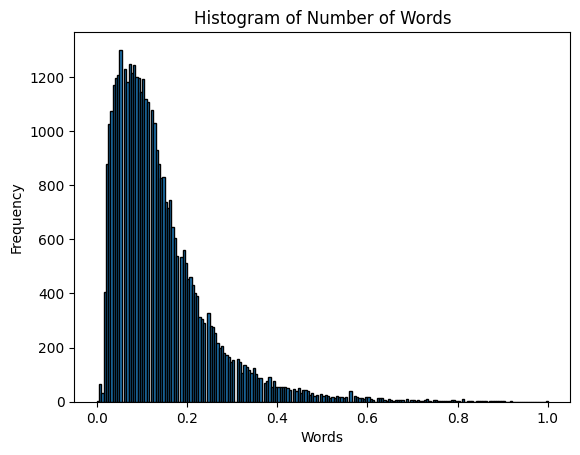

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.hist(Dataset['Words'], bins=200, edgecolor='black')

plt.title('Histogram of Number of Words')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [ ]:
Dataset_all = Dataset
Dataset_short = Dataset[Dataset['Words'] <= 0.1]
Dataset_medium = Dataset[(0.1 < Dataset['Words']) & (Dataset['Words'] <= 0.2)]
Dataset_long = Dataset[0.2 < Dataset['Words']]

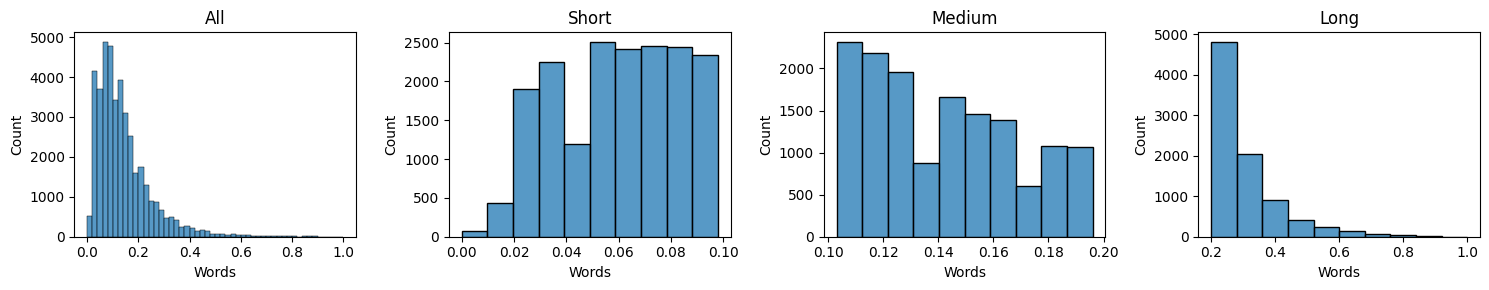

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 subplot structure
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

# Plot 1
sns.histplot(Dataset_all['Words'], bins=50, edgecolor='black', ax=axes[0])
axes[0].set_title('All')

# Plot 2
sns.histplot(Dataset_short['Words'], bins=10, edgecolor='black', ax=axes[1])
axes[1].set_title('Short')

# Plot 3
sns.histplot(Dataset_medium['Words'], bins=10, edgecolor='black', ax=axes[2])
axes[2].set_title('Medium')

# Plot 4
sns.histplot(Dataset_long['Words'], bins=10, edgecolor='black', ax=axes[3])
axes[3].set_title('Long')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
print("All:")
print("Spoken:  ", Dataset_all['Label'].value_counts().Spoken)
print("Written: ", Dataset_all['Label'].value_counts().Written)

print("\nShort:")
print("Spoken:  ", Dataset_short['Label'].value_counts().Spoken)
print("Written: ", Dataset_short['Label'].value_counts().Written)

print("\nMedium:")
print("Spoken:  ", Dataset_medium['Label'].value_counts().Spoken)
print("Written: ", Dataset_medium['Label'].value_counts().Written)

print("\nLong:")
print("Spoken:  ", Dataset_long['Label'].value_counts().Spoken)
print("Written: ", Dataset_long['Label'].value_counts().Written)

All:
Spoken:   20654
Written:  20652

Short:
Spoken:   8582
Written:  9439

Medium:
Spoken:   7403
Written:  7188

Long:
Spoken:   4669
Written:  4025


In [ ]:
Dataset_all.groupby('Label')['Nsubj'].value_counts()

Label    Nsubj
Spoken   0.5      9308
         1.0      9110
         0.0      2236
Written  0.5      9613
         1.0      8799
         0.0      2240
Name: count, dtype: int64

In [ ]:
Dataset_short.groupby('Label')['CONJP'].value_counts()

Label    CONJP
Spoken   0.0      8549
         1.0        33
Written  0.0      9408
         1.0        31
Name: count, dtype: int64

### SVMs

#### SVM (all)

In [ ]:
Dataset_all['Label_num'].value_counts()

,count
Label_num,
0,20654
1,20652


In [ ]:
Dataset = Dataset_all.reset_index(drop=True)

In [ ]:
Dataset = Dataset.drop(['Sentence'], axis=1)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
X = []

for i in range(len(Dataset)):
    X.append([Dataset['longest_path_parstree'][i],
              Dataset['Length'][i],
              Dataset['Words'][i],
              Dataset['depth_parstree'][i],
              Dataset['verb_percent'][i],
              Dataset['adverb_percent'][i],
              Dataset['noun_percent'][i],
              Dataset['coord_percent'][i],
              Dataset['subord_percent'][i],
              Dataset['questions'][i],
              Dataset['questions_wh'][i],
              Dataset['PRP_first_percent'][i],
              Dataset['PRP_second_percent'][i],
              Dataset['PRP_third_percent'][i],
              Dataset['noun_phrase'][i],
              Dataset['Passive'][i],
              Dataset['Compare_Super'][i],
              Dataset['CONJP'][i],
              Dataset['Imperative'][i],
              Dataset['Nsubj'][i],
              Dataset['PP_Percent'][i],
              Dataset['PP_VP_Percent'][i],
              Dataset['PP_NP_Percent'][i],
              Dataset['PP_O_Percent'][i]]
             )

del i

X = np.array(X)
X


array([[0.361, 0.334, 0.304, ..., 0.12 , 0.14 , 0.09 ],
       [0.049, 0.03 , 0.027, ..., 0.   , 0.   , 0.83 ],
       [0.311, 0.23 , 0.272, ..., 0.04 , 0.16 , 0.   ],
       ...,
       [0.279, 0.24 , 0.299, ..., 0.14 , 0.14 , 0.   ],
       [0.246, 0.082, 0.103, ..., 0.05 , 0.   , 0.   ],
       [0.246, 0.164, 0.125, ..., 0.25 , 0.12 , 0.12 ]])

In [ ]:
y = np.array(Dataset['Label_num'])
y

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
# Using np.bincount to count occurrences of 0 and 1
counts = np.bincount(y)

# The counts array will have the count of 0s at index 0 and the count of 1s at index 1
count_zeros = counts[0]
count_ones = counts[1]

print("Number of 0s:", count_zeros)
print("Number of 1s:", count_ones)

Number of 0s: 20654
Number of 1s: 20652


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
#Build the model
svm_all = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm_all.fit(X_train, y_train)

SVC(gamma=0.5)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = svm_all.predict(X_test)

accuracy_all = accuracy_score(y_test, y_pred)
conf_matrix_all = confusion_matrix(y_test, y_pred)
class_report_all = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy_all)
print("Confusion Matrix:\n", conf_matrix_all)
print("Classification Report:\n", class_report_all)

Accuracy: 0.6218833212297264
Confusion Matrix:
 [[2656 1423]
 [1701 2482]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.65      0.63      4079
           1       0.64      0.59      0.61      4183

    accuracy                           0.62      8262
   macro avg       0.62      0.62      0.62      8262
weighted avg       0.62      0.62      0.62      8262



In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(svm_all, X_test, y_test, n_repeats=10, random_state=42)
print(result.importances_mean)

In [ ]:
#pip install joblib

In [ ]:
# Saving Model:
'''
from joblib import dump, load

dump(svm, 'svm_model_all.joblib')'''

"\nfrom joblib import dump, load\n\ndump(svm, 'svm_model_all.joblib')"

In [ ]:
# Loading Model:

#svm = load('svm_model.joblib')

#### SVM (short)

In [ ]:
Dataset_short['Label_num'].value_counts()

,count
Label_num,
1,9439
0,8582


In [ ]:
Dataset = Dataset_short.reset_index(drop=True)

In [ ]:
Dataset = Dataset.drop(['Sentence'], axis=1)

In [ ]:
Dataset

,Label,Label_num,Length,Words,depth_parstree,longest_path_parstree,verb_percent,adverb_percent,noun_percent,coord_percent,...,PRP_first_percent,PRP_second_percent,PRP_third_percent,noun_phrase,Passive,Compare_Super,CONJP,Imperative,Nsubj,PP_Percent
0,Written,1,0.030,0.027,0.035,0.049,0.00,0.00,0.20,0.20,...,0.00,0.00,0.00,0.011,1.0,1.0,0.0,0.0,0.0,0.83
1,Spoken,0,0.044,0.043,0.070,0.098,0.25,0.12,0.25,0.00,...,0.00,0.00,0.00,0.022,1.0,1.0,0.0,0.0,1.0,0.22
2,Spoken,0,0.032,0.043,0.140,0.164,0.43,0.29,0.00,0.00,...,0.14,0.00,0.00,0.011,1.0,1.0,0.0,0.0,0.5,0.00
3,Written,1,0.055,0.065,0.053,0.098,0.08,0.00,0.08,0.08,...,0.00,0.00,0.08,0.033,1.0,1.0,0.0,0.0,0.5,0.15
4,Written,1,0.041,0.049,0.053,0.082,0.12,0.25,0.12,0.12,...,0.00,0.12,0.00,0.022,1.0,1.0,0.0,0.0,0.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18016,Written,1,0.080,0.087,0.105,0.131,0.12,0.06,0.31,0.00,...,0.00,0.00,0.00,0.056,1.0,0.5,0.0,0.0,1.0,0.47
18017,Written,1,0.098,0.098,0.070,0.115,0.06,0.12,0.24,0.12,...,0.00,0.00,0.06,0.078,1.0,0.0,0.0,0.0,1.0,0.11
18018,Written,1,0.051,0.065,0.158,0.180,0.18,0.18,0.27,0.00,...,0.00,0.00,0.00,0.044,1.0,1.0,0.0,0.0,1.0,0.38
18019,Written,1,0.019,0.033,0.035,0.082,0.20,0.00,0.20,0.00,...,0.00,0.00,0.00,0.022,1.0,1.0,0.0,0.0,1.0,0.29


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
X = []

for i in range(len(Dataset)):
    X.append([Dataset['longest_path_parstree'][i],
              Dataset['Length'][i],
              Dataset['Words'][i],
              Dataset['depth_parstree'][i],
              Dataset['verb_percent'][i],
              Dataset['adverb_percent'][i],
              Dataset['noun_percent'][i],
              Dataset['coord_percent'][i],
              Dataset['subord_percent'][i],
              Dataset['questions'][i],
              Dataset['questions_wh'][i],
              Dataset['PRP_first_percent'][i],
              Dataset['PRP_second_percent'][i],
              Dataset['PRP_third_percent'][i],
              Dataset['noun_phrase'][i],
              Dataset['Passive'][i],
              Dataset['Compare_Super'][i],
              Dataset['CONJP'][i],
              Dataset['Imperative'][i],
              Dataset['Nsubj'][i],
              Dataset['PP_Percent'][i],
              Dataset['PP_VP_Percent'][i],
              Dataset['PP_NP_Percent'][i],
              Dataset['PP_O_Percent'][i]]
             )

del i

X = np.array(X)
X


array([[0.049, 0.03 , 0.027, ..., 0.   , 0.   , 0.83 ],
       [0.098, 0.044, 0.043, ..., 0.   , 1.   , 0.22 ],
       [0.164, 0.032, 0.043, ..., 0.   , 0.5  , 0.   ],
       ...,
       [0.18 , 0.051, 0.065, ..., 0.   , 1.   , 0.38 ],
       [0.082, 0.019, 0.033, ..., 0.   , 1.   , 0.29 ],
       [0.115, 0.062, 0.071, ..., 0.   , 1.   , 0.43 ]])

In [ ]:
y = np.array(Dataset['Label_num'])
y

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
# Using np.bincount to count occurrences of 0 and 1
counts = np.bincount(y)

# The counts array will have the count of 0s at index 0 and the count of 1s at index 1
count_zeros = counts[0]
count_ones = counts[1]

print("Number of 0s:", count_zeros)
print("Number of 1s:", count_ones)

Number of 0s: 8582
Number of 1s: 9439


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
#Build the model
svm_short = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm_short.fit(X_train, y_train)

SVC(gamma=0.5)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = svm_short.predict(X_test)

accuracy_short = accuracy_score(y_test, y_pred)
conf_matrix_short = confusion_matrix(y_test, y_pred)
class_report_short = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy_short)
print("Confusion Matrix:\n", conf_matrix_short)
print("Classification Report:\n", class_report_short)

Accuracy: 0.6097087378640776
Confusion Matrix:
 [[ 995  738]
 [ 669 1203]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.57      0.59      1733
           1       0.62      0.64      0.63      1872

    accuracy                           0.61      3605
   macro avg       0.61      0.61      0.61      3605
weighted avg       0.61      0.61      0.61      3605



In [ ]:
#pip install joblib

In [ ]:
'''# Saving Model:

from joblib import dump, load

dump(svm, 'svm_model_short.joblib')'''

"# Saving Model:\n\nfrom joblib import dump, load\n\ndump(svm, 'svm_model_short.joblib')"

In [ ]:
# Loading Model:

#svm = load('svm_model.joblib')

#### SVM (medium)

In [ ]:
Dataset_medium['Label_num'].value_counts()

,count
Label_num,
0,7403
1,7188


In [ ]:
Dataset = Dataset_medium.reset_index(drop=True)

In [ ]:
Dataset = Dataset.drop(['Sentence'], axis=1)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
X = []

for i in range(len(Dataset)):
    X.append([Dataset['longest_path_parstree'][i],
              Dataset['Length'][i],
              Dataset['Words'][i],
              Dataset['depth_parstree'][i],
              Dataset['verb_percent'][i],
              Dataset['adverb_percent'][i],
              Dataset['noun_percent'][i],
              Dataset['coord_percent'][i],
              Dataset['subord_percent'][i],
              Dataset['questions'][i],
              Dataset['questions_wh'][i],
              Dataset['PRP_first_percent'][i],
              Dataset['PRP_second_percent'][i],
              Dataset['PRP_third_percent'][i],
              Dataset['noun_phrase'][i],
              Dataset['Passive'][i],
              Dataset['Compare_Super'][i],
              Dataset['CONJP'][i],
              Dataset['Imperative'][i],
              Dataset['Nsubj'][i],
              Dataset['PP_Percent'][i],
              Dataset['PP_VP_Percent'][i],
              Dataset['PP_NP_Percent'][i],
              Dataset['PP_O_Percent'][i]]
             )

del i

X = np.array(X)
X


array([[0.23 , 0.113, 0.109, ..., 0.   , 0.   , 0.48 ],
       [0.197, 0.109, 0.114, ..., 0.   , 0.5  , 0.5  ],
       [0.23 , 0.087, 0.114, ..., 0.   , 1.   , 0.14 ],
       ...,
       [0.131, 0.159, 0.179, ..., 0.   , 1.   , 0.09 ],
       [0.246, 0.082, 0.103, ..., 0.   , 0.5  , 0.05 ],
       [0.246, 0.164, 0.125, ..., 0.   , 0.5  , 0.5  ]])

In [ ]:
y = np.array(Dataset['Label_num'])
y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
# Using np.bincount to count occurrences of 0 and 1
counts = np.bincount(y)

# The counts array will have the count of 0s at index 0 and the count of 1s at index 1
count_zeros = counts[0]
count_ones = counts[1]

print("Number of 0s:", count_zeros)
print("Number of 1s:", count_ones)

Number of 0s: 7403
Number of 1s: 7188


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
#Build the model
svm_medium = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm_medium.fit(X_train, y_train)

SVC(gamma=0.5)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = svm_medium.predict(X_test)

accuracy_medium = accuracy_score(y_test, y_pred)
conf_matrix_medium = confusion_matrix(y_test, y_pred)
class_report_medium = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy_medium)
print("Confusion Matrix:\n", conf_matrix_medium)
print("Classification Report:\n", class_report_medium)

Accuracy: 0.6073997944501541
Confusion Matrix:
 [[1007  481]
 [ 665  766]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.68      0.64      1488
           1       0.61      0.54      0.57      1431

    accuracy                           0.61      2919
   macro avg       0.61      0.61      0.60      2919
weighted avg       0.61      0.61      0.61      2919



In [ ]:
#pip install joblib

In [ ]:
'''# Saving Model:

from joblib import dump, load

dump(svm, 'svm_model_medium.joblib')'''

"# Saving Model:\n\nfrom joblib import dump, load\n\ndump(svm, 'svm_model_medium.joblib')"

In [ ]:
# Loading Model:

#svm = load('svm_model.joblib')

#### SVM (long)

In [ ]:
Dataset_long['Label_num'].value_counts()

,count
Label_num,
0,4669
1,4025


In [ ]:
Dataset = Dataset_long.reset_index(drop=True)

In [ ]:
Dataset = Dataset.drop(['Sentence'], axis=1)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
X = []

for i in range(len(Dataset)):
    X.append([Dataset['longest_path_parstree'][i],
              Dataset['Length'][i],
              Dataset['Words'][i],
              Dataset['depth_parstree'][i],
              Dataset['verb_percent'][i],
              Dataset['adverb_percent'][i],
              Dataset['noun_percent'][i],
              Dataset['coord_percent'][i],
              Dataset['subord_percent'][i],
              Dataset['questions'][i],
              Dataset['questions_wh'][i],
              Dataset['PRP_first_percent'][i],
              Dataset['PRP_second_percent'][i],
              Dataset['PRP_third_percent'][i],
              Dataset['noun_phrase'][i],
              Dataset['Passive'][i],
              Dataset['Compare_Super'][i],
              Dataset['CONJP'][i],
              Dataset['Imperative'][i],
              Dataset['Nsubj'][i],
              Dataset['PP_Percent'][i],
              Dataset['PP_VP_Percent'][i],
              Dataset['PP_NP_Percent'][i],
              Dataset['PP_O_Percent'][i]]
             )

del i

X = np.array(X)
X


array([[0.361, 0.334, 0.304, ..., 0.   , 1.   , 0.35 ],
       [0.311, 0.23 , 0.272, ..., 0.   , 0.5  , 0.2  ],
       [0.508, 0.424, 0.489, ..., 0.   , 0.5  , 0.35 ],
       ...,
       [0.197, 0.219, 0.212, ..., 0.   , 0.5  , 0.3  ],
       [0.459, 0.335, 0.315, ..., 0.   , 1.   , 0.63 ],
       [0.279, 0.24 , 0.299, ..., 0.   , 1.   , 0.29 ]])

In [ ]:
y = np.array(Dataset['Label_num'])
y

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
# Using np.bincount to count occurrences of 0 and 1
counts = np.bincount(y)

# The counts array will have the count of 0s at index 0 and the count of 1s at index 1
count_zeros = counts[0]
count_ones = counts[1]

print("Number of 0s:", count_zeros)
print("Number of 1s:", count_ones)

Number of 0s: 4669
Number of 1s: 4025


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
#Build the model
svm_long = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm_long.fit(X_train, y_train)

SVC(gamma=0.5)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = svm_long.predict(X_test)

accuracy_long = accuracy_score(y_test, y_pred)
conf_matrix_long = confusion_matrix(y_test, y_pred)
class_report_long = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy_long)
print("Confusion Matrix:\n", conf_matrix_long)
print("Classification Report:\n", class_report_long)

Accuracy: 0.6607245543415756
Confusion Matrix:
 [[673 295]
 [295 476]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70       968
           1       0.62      0.62      0.62       771

    accuracy                           0.66      1739
   macro avg       0.66      0.66      0.66      1739
weighted avg       0.66      0.66      0.66      1739



In [ ]:
#pip install joblib

In [ ]:
'''# Saving Model:

from joblib import dump, load

dump(svm, 'svm_model_long.joblib')'''

"# Saving Model:\n\nfrom joblib import dump, load\n\ndump(svm, 'svm_model_long.joblib')"

In [ ]:
# Loading Model:

#svm = load('svm_model.joblib')

#### Results

In [ ]:
# All:

print("Accuracy:", accuracy_all)
print("Confusion Matrix:\n", conf_matrix_all)
print("Classification Report:\n", class_report_all)

Accuracy: 0.6157104817235536
Confusion Matrix:
 [[2629 1450]
 [1725 2458]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.64      0.62      4079
           1       0.63      0.59      0.61      4183

    accuracy                           0.62      8262
   macro avg       0.62      0.62      0.62      8262
weighted avg       0.62      0.62      0.62      8262



In [ ]:
# Short:

print("Accuracy:", accuracy_short)
print("Confusion Matrix:\n", conf_matrix_short)
print("Classification Report:\n", class_report_short)

Accuracy: 0.6097087378640776
Confusion Matrix:
 [[ 995  738]
 [ 669 1203]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.57      0.59      1733
           1       0.62      0.64      0.63      1872

    accuracy                           0.61      3605
   macro avg       0.61      0.61      0.61      3605
weighted avg       0.61      0.61      0.61      3605



In [ ]:
#Medium:

print("Accuracy:", accuracy_medium)
print("Confusion Matrix:\n", conf_matrix_medium)
print("Classification Report:\n", class_report_medium)

Accuracy: 0.6073997944501541
Confusion Matrix:
 [[1007  481]
 [ 665  766]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.68      0.64      1488
           1       0.61      0.54      0.57      1431

    accuracy                           0.61      2919
   macro avg       0.61      0.61      0.60      2919
weighted avg       0.61      0.61      0.61      2919



In [ ]:
#Long:

print("Accuracy:", accuracy_long)
print("Confusion Matrix:\n", conf_matrix_long)
print("Classification Report:\n", class_report_long)

Accuracy: 0.6607245543415756
Confusion Matrix:
 [[673 295]
 [295 476]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70       968
           1       0.62      0.62      0.62       771

    accuracy                           0.66      1739
   macro avg       0.66      0.66      0.66      1739
weighted avg       0.66      0.66      0.66      1739



### Decision Tree

#### Decision Tree (all)

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
import numpy as np

In [ ]:
Dataset = Dataset_all.reset_index(drop=True)

In [ ]:
Dataset = Dataset.drop(['Sentence'], axis=1)

In [ ]:
X = []

for i in range(len(Dataset)):
    X.append([Dataset['Length'][i],
              Dataset['Words'][i],
              Dataset['longest_path_parstree'][i],
              Dataset['depth_parstree'][i],
              Dataset['verb_percent'][i],
              Dataset['adverb_percent'][i],
              Dataset['noun_percent'][i],
              Dataset['coord_percent'][i],
              Dataset['subord_percent'][i],
              Dataset['questions'][i],
              Dataset['questions_wh'][i],
              Dataset['PRP_first_percent'][i],
              Dataset['PRP_second_percent'][i],
              Dataset['PRP_third_percent'][i],
              Dataset['noun_phrase'][i],
              Dataset['Passive'][i],
              Dataset['Compare_Super'][i],
              Dataset['CONJP'][i],
              Dataset['Imperative'][i],
              Dataset['Nsubj'][i],
              Dataset['PP_Percent'][i],
              Dataset['PP_VP_Percent'][i],
              Dataset['PP_NP_Percent'][i],
              Dataset['PP_O_Percent'][i]]
             )

del i

X = np.array(X)
X


array([[0.334, 0.304, 0.361, ..., 0.12 , 0.14 , 0.09 ],
       [0.03 , 0.027, 0.049, ..., 0.   , 0.   , 0.83 ],
       [0.23 , 0.272, 0.311, ..., 0.04 , 0.16 , 0.   ],
       ...,
       [0.24 , 0.299, 0.279, ..., 0.14 , 0.14 , 0.   ],
       [0.082, 0.103, 0.246, ..., 0.05 , 0.   , 0.   ],
       [0.164, 0.125, 0.246, ..., 0.25 , 0.12 , 0.12 ]])

In [ ]:
X[1]

array([0.03 , 0.027, 0.049, 0.035, 0.   , 0.   , 0.2  , 0.2  , 0.2  ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.011, 1.   , 1.   , 0.   ,
       0.   , 0.   , 0.83 , 0.   , 0.   , 0.83 ])

In [ ]:
y = np.array(Dataset['Label_num'])
y

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf_all = DecisionTreeClassifier()

clf_all.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf_all.predict(X_test)

In [ ]:
from sklearn import metrics

accuracy_all = metrics.accuracy_score(y_test, y_pred)
conf_matrix_all = metrics.confusion_matrix(y_test, y_pred)
class_report_all = metrics.classification_report(y_test, y_pred)


print("Improved Accuracy:", accuracy_all)
print("Confusion Matrix:\n", conf_matrix_all)
print("Classification Report:\n", class_report_all)

Improved Accuracy: 0.5679012345679012
Confusion Matrix:
 [[2350 1729]
 [1841 2342]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.58      0.57      4079
           1       0.58      0.56      0.57      4183

    accuracy                           0.57      8262
   macro avg       0.57      0.57      0.57      8262
weighted avg       0.57      0.57      0.57      8262



In [ ]:
pip install seaborn

<ipython-input-59-e7c8bb8a820e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")


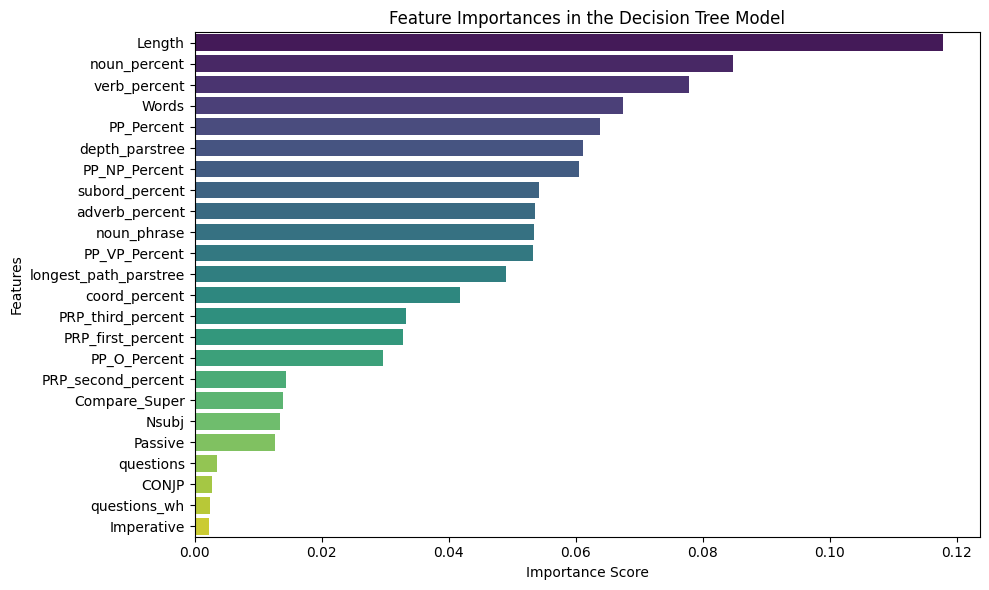

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = clf_all.feature_importances_
feature_names = ['Length', 'Words', 'longest_path_parstree', 'depth_parstree', 'verb_percent', 'adverb_percent', 'noun_percent', 'coord_percent', 'subord_percent', 'questions', 'questions_wh', 'PRP_first_percent', 'PRP_second_percent', 'PRP_third_percent', 'noun_phrase', 'Passive', 'Compare_Super', 'CONJP', 'Imperative', 'Nsubj', 'PP_Percent', 'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent']  # Complete this list with all feature names

importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

sorted_importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")

plt.title("Feature Importances in the Decision Tree Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
sorted_importances

,Feature,Importance
0,Length,0.117770
6,noun_percent,0.084730
4,verb_percent,0.077908
1,Words,0.067420
20,PP_Percent,0.063801
3,depth_parstree,0.061163
22,PP_NP_Percent,0.060606
8,subord_percent,0.054259
5,adverb_percent,0.053579
14,noun_phrase,0.053381


#### Decision Tree (short)

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [ ]:
Dataset = Dataset_short.reset_index(drop=True)

In [ ]:
Dataset = Dataset.drop(['Sentence'], axis=1)

In [ ]:
import numpy as np

X = []

for i in range(len(Dataset)):
    X.append([Dataset['Length'][i],
              Dataset['Words'][i],
              Dataset['longest_path_parstree'][i],
              Dataset['depth_parstree'][i],
              Dataset['verb_percent'][i],
              Dataset['adverb_percent'][i],
              Dataset['noun_percent'][i],
              Dataset['coord_percent'][i],
              Dataset['subord_percent'][i],
              Dataset['questions'][i],
              Dataset['questions_wh'][i],
              Dataset['PRP_first_percent'][i],
              Dataset['PRP_second_percent'][i],
              Dataset['PRP_third_percent'][i],
              Dataset['noun_phrase'][i],
              Dataset['Passive'][i],
              Dataset['Compare_Super'][i],
              Dataset['CONJP'][i],
              Dataset['Imperative'][i],
              Dataset['Nsubj'][i],
              Dataset['PP_Percent'][i],
              Dataset['PP_VP_Percent'][i],
              Dataset['PP_NP_Percent'][i],
              Dataset['PP_O_Percent'][i]]
             )


del i

X = np.array(X)
X

array([[0.03 , 0.027, 0.049, ..., 0.   , 0.   , 0.83 ],
       [0.044, 0.043, 0.098, ..., 0.22 , 0.   , 0.   ],
       [0.032, 0.043, 0.164, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.051, 0.065, 0.18 , ..., 0.23 , 0.15 , 0.   ],
       [0.019, 0.033, 0.082, ..., 0.   , 0.   , 0.29 ],
       [0.062, 0.071, 0.115, ..., 0.43 , 0.   , 0.   ]])

In [ ]:
X[1]

array([0.044, 0.043, 0.098, 0.07 , 0.25 , 0.12 , 0.25 , 0.   , 0.12 ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.022, 1.   , 1.   , 0.   ,
       0.   , 1.   , 0.22 , 0.22 , 0.   , 0.   ])

In [ ]:
y = np.array(Dataset['Label_num'])
y

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf_short = DecisionTreeClassifier()

clf_short.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf_short.predict(X_test)

In [ ]:
from sklearn import metrics

accuracy_short = metrics.accuracy_score(y_test, y_pred)
conf_matrix_short = metrics.confusion_matrix(y_test, y_pred)
class_report_short = metrics.classification_report(y_test, y_pred)


print("Improved Accuracy:", accuracy_short)
print("Confusion Matrix:\n", conf_matrix_short)
print("Classification Report:\n", class_report_short)

Improved Accuracy: 0.5808599167822469
Confusion Matrix:
 [[ 984  749]
 [ 762 1110]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.57      0.57      1733
           1       0.60      0.59      0.60      1872

    accuracy                           0.58      3605
   macro avg       0.58      0.58      0.58      3605
weighted avg       0.58      0.58      0.58      3605



In [ ]:
pip install seaborn

<ipython-input-72-096b48f1b6ba>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")


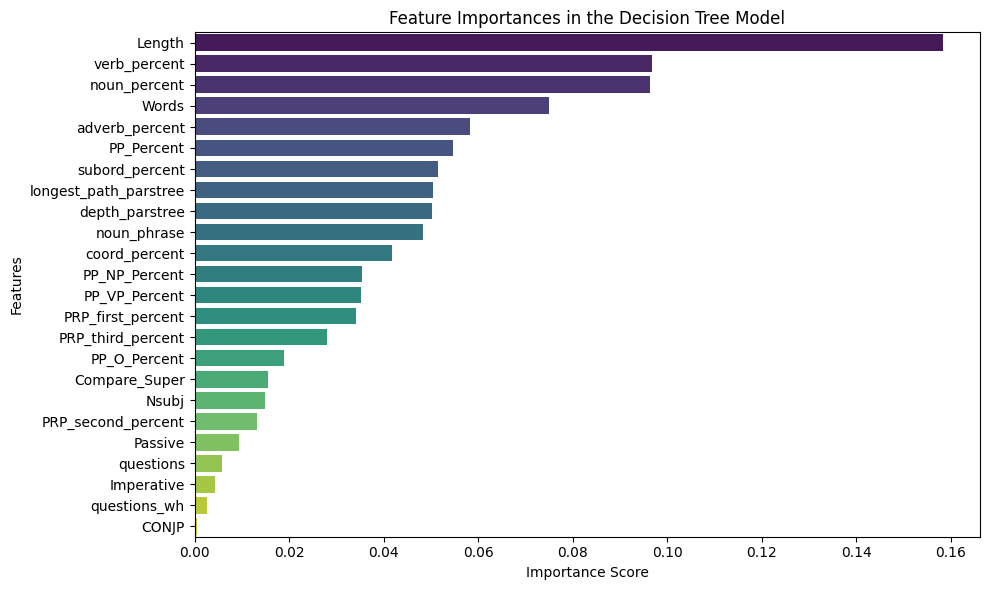

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = clf_short.feature_importances_
feature_names = ['Length', 'Words', 'longest_path_parstree', 'depth_parstree', 'verb_percent', 'adverb_percent', 'noun_percent', 'coord_percent', 'subord_percent', 'questions', 'questions_wh', 'PRP_first_percent', 'PRP_second_percent', 'PRP_third_percent', 'noun_phrase', 'Passive', 'Compare_Super', 'CONJP', 'Imperative', 'Nsubj', 'PP_Percent', 'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent']  # Complete this list with all feature names

importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

sorted_importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")

plt.title("Feature Importances in the Decision Tree Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
sorted_importances

,Feature,Importance
0,Length,0.158236
4,verb_percent,0.096664
6,noun_percent,0.096430
1,Words,0.075070
5,adverb_percent,0.058210
20,PP_Percent,0.054675
8,subord_percent,0.051499
2,longest_path_parstree,0.050481
3,depth_parstree,0.050301
14,noun_phrase,0.048273


#### Decision Tree (medium)

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [ ]:
Dataset = Dataset_medium.reset_index(drop=True)

In [ ]:
Dataset = Dataset.drop(['Sentence'], axis=1)

In [ ]:
import numpy as np

X = []

for i in range(len(Dataset)):
    X.append([Dataset['Length'][i],
              Dataset['Words'][i],
              Dataset['longest_path_parstree'][i],
              Dataset['depth_parstree'][i],
              Dataset['verb_percent'][i],
              Dataset['adverb_percent'][i],
              Dataset['noun_percent'][i],
              Dataset['coord_percent'][i],
              Dataset['subord_percent'][i],
              Dataset['questions'][i],
              Dataset['questions_wh'][i],
              Dataset['PRP_first_percent'][i],
              Dataset['PRP_second_percent'][i],
              Dataset['PRP_third_percent'][i],
              Dataset['noun_phrase'][i],
              Dataset['Passive'][i],
              Dataset['Compare_Super'][i],
              Dataset['CONJP'][i],
              Dataset['Imperative'][i],
              Dataset['Nsubj'][i],
              Dataset['PP_Percent'][i],
              Dataset['PP_VP_Percent'][i],
              Dataset['PP_NP_Percent'][i],
              Dataset['PP_O_Percent'][i]]
             )


del i

X = np.array(X)
X

array([[0.113, 0.109, 0.23 , ..., 0.33 , 0.14 , 0.   ],
       [0.109, 0.114, 0.197, ..., 0.14 , 0.36 , 0.   ],
       [0.087, 0.114, 0.23 , ..., 0.14 , 0.   , 0.   ],
       ...,
       [0.159, 0.179, 0.131, ..., 0.   , 0.09 , 0.   ],
       [0.082, 0.103, 0.246, ..., 0.05 , 0.   , 0.   ],
       [0.164, 0.125, 0.246, ..., 0.25 , 0.12 , 0.12 ]])

In [ ]:
X[1]

array([0.109, 0.114, 0.197, 0.175, 0.1  , 0.05 , 0.4  , 0.   , 0.15 ,
       0.   , 0.   , 0.05 , 0.   , 0.   , 0.089, 1.   , 1.   , 0.   ,
       0.   , 0.5  , 0.5  , 0.14 , 0.36 , 0.   ])

In [ ]:
y = np.array(Dataset['Label_num'])
y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf_medium = DecisionTreeClassifier()

clf_medium.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf_medium.predict(X_test)

In [ ]:
from sklearn import metrics

accuracy_medium = metrics.accuracy_score(y_test, y_pred)
conf_matrix_medium = metrics.confusion_matrix(y_test, y_pred)
class_report_medium = metrics.classification_report(y_test, y_pred)


print("Improved Accuracy:", accuracy_medium)
print("Confusion Matrix:\n", conf_matrix_medium)
print("Classification Report:\n", class_report_medium)

Improved Accuracy: 0.5707434052757794
Confusion Matrix:
 [[847 641]
 [612 819]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.57      0.57      1488
           1       0.56      0.57      0.57      1431

    accuracy                           0.57      2919
   macro avg       0.57      0.57      0.57      2919
weighted avg       0.57      0.57      0.57      2919



In [ ]:
pip install seaborn

<ipython-input-85-f543de3d6086>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")


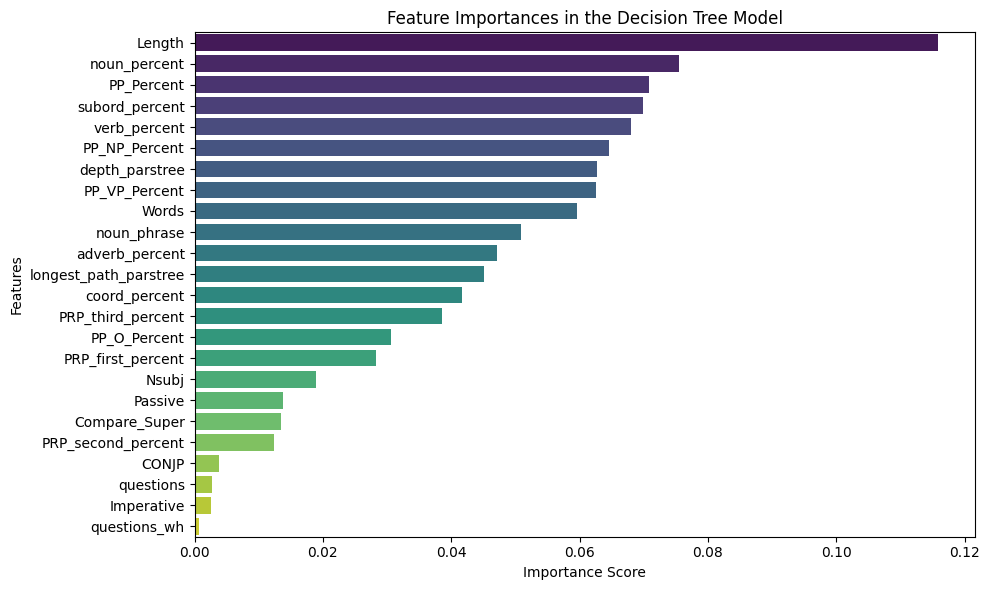

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = clf_medium.feature_importances_
feature_names = ['Length', 'Words', 'longest_path_parstree', 'depth_parstree', 'verb_percent', 'adverb_percent', 'noun_percent', 'coord_percent', 'subord_percent', 'questions', 'questions_wh', 'PRP_first_percent', 'PRP_second_percent', 'PRP_third_percent', 'noun_phrase', 'Passive', 'Compare_Super', 'CONJP', 'Imperative', 'Nsubj', 'PP_Percent', 'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent']  # Complete this list with all feature names

importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

sorted_importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")

plt.title("Feature Importances in the Decision Tree Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
sorted_importances

,Feature,Importance
0,Length,0.115885
6,noun_percent,0.075526
20,PP_Percent,0.070799
8,subord_percent,0.069895
4,verb_percent,0.068045
22,PP_NP_Percent,0.064578
3,depth_parstree,0.062685
21,PP_VP_Percent,0.062515
1,Words,0.059620
14,noun_phrase,0.050856


#### Decision Tree (long)

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [ ]:
Dataset = Dataset_long.reset_index(drop=True)

In [ ]:
Dataset = Dataset.drop(['Sentence'], axis=1)

In [ ]:
import numpy as np

X = []

for i in range(len(Dataset)):
    X.append([Dataset['Length'][i],
              Dataset['Words'][i],
              Dataset['longest_path_parstree'][i],
              Dataset['depth_parstree'][i],
              Dataset['verb_percent'][i],
              Dataset['adverb_percent'][i],
              Dataset['noun_percent'][i],
              Dataset['coord_percent'][i],
              Dataset['subord_percent'][i],
              Dataset['questions'][i],
              Dataset['questions_wh'][i],
              Dataset['PRP_first_percent'][i],
              Dataset['PRP_second_percent'][i],
              Dataset['PRP_third_percent'][i],
              Dataset['noun_phrase'][i],
              Dataset['Passive'][i],
              Dataset['Compare_Super'][i],
              Dataset['CONJP'][i],
              Dataset['Imperative'][i],
              Dataset['Nsubj'][i],
              Dataset['PP_Percent'][i],
              Dataset['PP_VP_Percent'][i],
              Dataset['PP_NP_Percent'][i],
              Dataset['PP_O_Percent'][i]]
             )


del i

X = np.array(X)
X

array([[0.334, 0.304, 0.361, ..., 0.12 , 0.14 , 0.09 ],
       [0.23 , 0.272, 0.311, ..., 0.04 , 0.16 , 0.   ],
       [0.424, 0.489, 0.508, ..., 0.18 , 0.14 , 0.03 ],
       ...,
       [0.219, 0.212, 0.197, ..., 0.   , 0.18 , 0.12 ],
       [0.335, 0.315, 0.459, ..., 0.46 , 0.12 , 0.05 ],
       [0.24 , 0.299, 0.279, ..., 0.14 , 0.14 , 0.   ]])

In [ ]:
X[1]

array([0.23 , 0.272, 0.311, 0.211, 0.22 , 0.04 , 0.17 , 0.02 , 0.17 ,
       0.   , 0.   , 0.04 , 0.   , 0.02 , 0.189, 1.   , 1.   , 0.   ,
       0.   , 0.5  , 0.2  , 0.04 , 0.16 , 0.   ])

In [ ]:
y = np.array(Dataset['Label_num'])
y

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf_long = DecisionTreeClassifier()

clf_long.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf_long.predict(X_test)

In [ ]:
from sklearn import metrics

accuracy_long = metrics.accuracy_score(y_test, y_pred)
conf_matrix_long = metrics.confusion_matrix(y_test, y_pred)
class_report_long = metrics.classification_report(y_test, y_pred)


print("Improved Accuracy:", accuracy_long)
print("Confusion Matrix:\n", conf_matrix_long)
print("Classification Report:\n", class_report_long)

Improved Accuracy: 0.577343300747556
Confusion Matrix:
 [[565 403]
 [332 439]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.58      0.61       968
           1       0.52      0.57      0.54       771

    accuracy                           0.58      1739
   macro avg       0.58      0.58      0.58      1739
weighted avg       0.58      0.58      0.58      1739



In [ ]:
pip install seaborn

<ipython-input-183-dcea3d0545be>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")


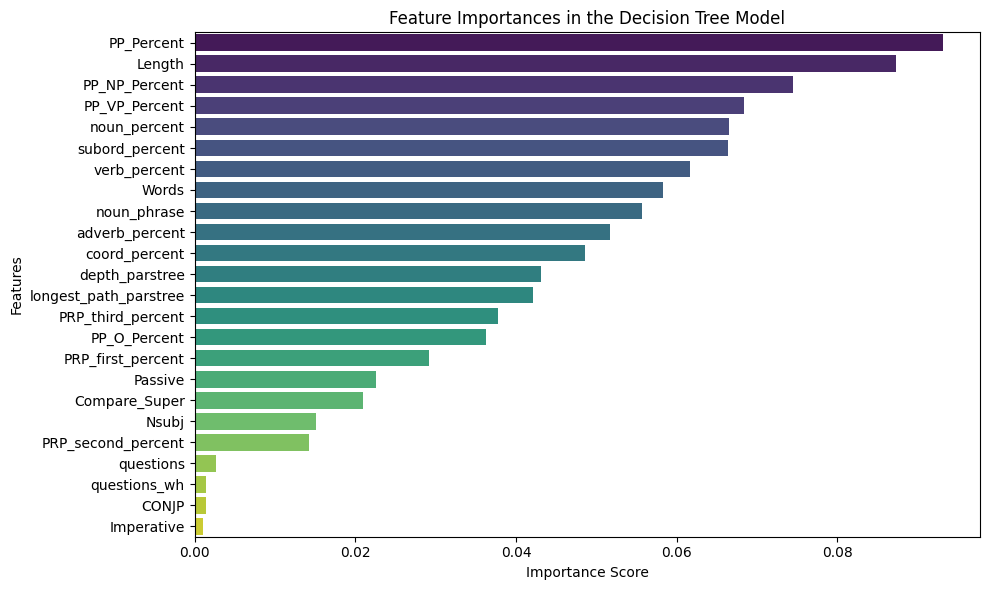

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = clf_long.feature_importances_
feature_names = ['Length', 'Words', 'longest_path_parstree', 'depth_parstree', 'verb_percent', 'adverb_percent', 'noun_percent', 'coord_percent', 'subord_percent', 'questions', 'questions_wh', 'PRP_first_percent', 'PRP_second_percent', 'PRP_third_percent', 'noun_phrase', 'Passive', 'Compare_Super', 'CONJP', 'Imperative', 'Nsubj', 'PP_Percent', 'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent']  # Complete this list with all feature names

importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

sorted_importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")

plt.title("Feature Importances in the Decision Tree Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
sorted_importances

,Feature,Importance
20,PP_Percent,0.093082
0,Length,0.087343
22,PP_NP_Percent,0.074508
21,PP_VP_Percent,0.068311
6,noun_percent,0.066517
8,subord_percent,0.066402
4,verb_percent,0.061629
1,Words,0.058351
14,noun_phrase,0.055735
5,adverb_percent,0.051753


#### Results

In [ ]:
# All

print("Improved Accuracy:", accuracy_all)
print("Confusion Matrix:\n", conf_matrix_all)
print("Classification Report:\n", class_report_all)

Improved Accuracy: 0.5721374969740983
Confusion Matrix:
 [[2351 1728]
 [1807 2376]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.58      0.57      4079
           1       0.58      0.57      0.57      4183

    accuracy                           0.57      8262
   macro avg       0.57      0.57      0.57      8262
weighted avg       0.57      0.57      0.57      8262



In [ ]:
# Short

print("Improved Accuracy:", accuracy_short)
print("Confusion Matrix:\n", conf_matrix_short)
print("Classification Report:\n", class_report_short)

Improved Accuracy: 0.5578363384188627
Confusion Matrix:
 [[ 897  836]
 [ 758 1114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.52      0.53      1733
           1       0.57      0.60      0.58      1872

    accuracy                           0.56      3605
   macro avg       0.56      0.56      0.56      3605
weighted avg       0.56      0.56      0.56      3605



In [ ]:
# Medium

print("Improved Accuracy:", accuracy_medium)
print("Confusion Matrix:\n", conf_matrix_medium)
print("Classification Report:\n", class_report_medium)

Improved Accuracy: 0.5731414868105515
Confusion Matrix:
 [[853 635]
 [611 820]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.57      0.58      1488
           1       0.56      0.57      0.57      1431

    accuracy                           0.57      2919
   macro avg       0.57      0.57      0.57      2919
weighted avg       0.57      0.57      0.57      2919



In [ ]:
# Long

print("Improved Accuracy:", accuracy_long)
print("Confusion Matrix:\n", conf_matrix_long)
print("Classification Report:\n", class_report_long)

Improved Accuracy: 0.5991949396204715
Confusion Matrix:
 [[631 337]
 [360 411]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.65      0.64       968
           1       0.55      0.53      0.54       771

    accuracy                           0.60      1739
   macro avg       0.59      0.59      0.59      1739
weighted avg       0.60      0.60      0.60      1739



### Random Forest

#### Random Forest (all)

In [ ]:
!pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 663.9 kB/s eta 0:00:00


In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
Dataset = Dataset_all.reset_index(drop=True)

In [ ]:
Dataset = Dataset.drop(['Sentence'], axis=1)

In [ ]:
# Split the data into features (X) and target (y)

X = Dataset[['Length', 'Words', 'longest_path_parstree', 'depth_parstree', 'verb_percent', 'adverb_percent', 'noun_percent', 'coord_percent', 'subord_percent', 'questions', 'questions_wh', 'PRP_first_percent', 'PRP_second_percent', 'PRP_third_percent', 'noun_phrase', 'Passive', 'Compare_Super', 'CONJP', 'Imperative', 'Nsubj', 'PP_Percent', 'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent']]  # Complete this list with all feature names
y = Dataset['Label_num']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search_balanced = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search_balanced.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7acf8c378880>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7acf8c378c70>})

In [ ]:
y_pred = rand_search_balanced.predict(X_test)

In [ ]:
accuracy_balanced = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_balanced)

Accuracy: 0.6397966594045026


In [ ]:
# Create a variable for the best model
best_rf = rand_search_balanced.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search_balanced.best_params_)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 160}


In [ ]:
from sklearn import metrics

accuracy_balanced = metrics.accuracy_score(y_test, y_pred)
conf_matrix_balanced = metrics.confusion_matrix(y_test, y_pred)
class_report_balanced = metrics.classification_report(y_test, y_pred)

print("Improved Accuracy:", accuracy_balanced)
print("Confusion Matrix:\n", conf_matrix_balanced)
print("Classification Report:\n", class_report_balanced)

Improved Accuracy: 0.6397966594045026
Confusion Matrix:
 [[2739 1340]
 [1636 2547]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.67      0.65      4079
           1       0.66      0.61      0.63      4183

    accuracy                           0.64      8262
   macro avg       0.64      0.64      0.64      8262
weighted avg       0.64      0.64      0.64      8262



In [ ]:
# Paper 1 results:

'''
Improved Accuracy: 0.615819209039548
Confusion Matrix:
 [[277 151]
 [189 268]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.65      0.62       428
           1       0.64      0.59      0.61       457

    accuracy                           0.62       885
   macro avg       0.62      0.62      0.62       885
weighted avg       0.62      0.62      0.62       885
'''

'\nImproved Accuracy: 0.615819209039548\nConfusion Matrix:\n [[277 151]\n [189 268]]\nClassification Report:\n               precision    recall  f1-score   support\n\n           0       0.59      0.65      0.62       428\n           1       0.64      0.59      0.61       457\n\n    accuracy                           0.62       885\n   macro avg       0.62      0.62      0.62       885\nweighted avg       0.62      0.62      0.62       885\n'

<ipython-input-111-06c8ca223909>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")


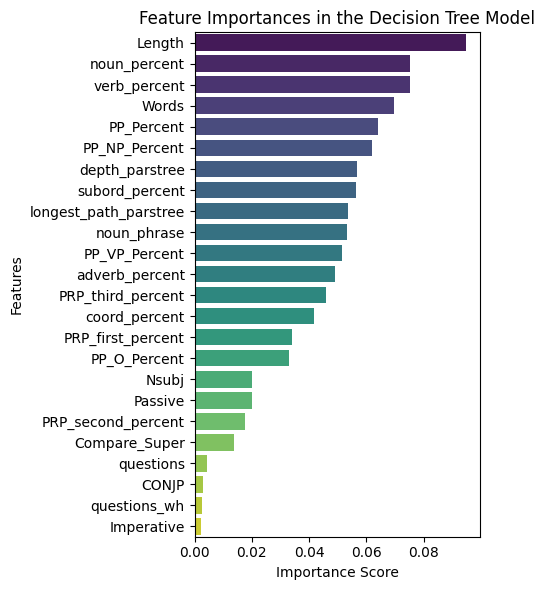

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

best_rf = rand_search_balanced.best_estimator_
feature_importance = best_rf.feature_importances_
feature_names = ['Length', 'Words', 'longest_path_parstree', 'depth_parstree', 'verb_percent', 'adverb_percent', 'noun_percent', 'coord_percent', 'subord_percent', 'questions', 'questions_wh', 'PRP_first_percent', 'PRP_second_percent', 'PRP_third_percent', 'noun_phrase', 'Passive', 'Compare_Super', 'CONJP', 'Imperative', 'Nsubj', 'PP_Percent', 'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent']  # Complete this list with all feature names

importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

sorted_importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(5, 6))
sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")

plt.title("Feature Importances in the Decision Tree Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
sorted_importances

,Feature,Importance
0,Length,0.094928
6,noun_percent,0.075399
4,verb_percent,0.075116
1,Words,0.069513
20,PP_Percent,0.064078
22,PP_NP_Percent,0.061829
3,depth_parstree,0.056558
8,subord_percent,0.056419
2,longest_path_parstree,0.053697
14,noun_phrase,0.053148


#### Random Forest (short)

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
Dataset = Dataset_short.reset_index(drop=True)

In [ ]:
Dataset = Dataset.drop(['Sentence'], axis=1)

In [ ]:
# Split the data into features (X) and target (y)
X = Dataset[['Length', 'Words', 'longest_path_parstree', 'depth_parstree', 'verb_percent', 'adverb_percent', 'noun_percent', 'coord_percent', 'subord_percent', 'questions', 'questions_wh', 'PRP_first_percent', 'PRP_second_percent', 'PRP_third_percent', 'noun_phrase', 'Passive', 'Compare_Super', 'CONJP', 'Imperative', 'Nsubj', 'PP_Percent', 'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent']]  # Complete this list with all feature names
y = Dataset['Label_num']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search_short_balanced = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search_short_balanced.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7acf8a58a1d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7acf8aba6230>})

In [ ]:
y_pred = rand_search_short_balanced.predict(X_test)

In [ ]:
accuracy_short_balanced = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_short_balanced)

Accuracy: 0.6471567267683772


In [ ]:
# Create a variable for the best model
best_rf = rand_search_short_balanced.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search_short_balanced.best_params_)

Best hyperparameters: {'max_depth': 14, 'n_estimators': 379}


In [ ]:
from sklearn import metrics

accuracy_short_balanced = metrics.accuracy_score(y_test, y_pred)
conf_matrix_short_balanced = metrics.confusion_matrix(y_test, y_pred)
class_report_short_balanced = metrics.classification_report(y_test, y_pred)

print("Improved Accuracy:", accuracy_short_balanced)
print("Confusion Matrix:\n", conf_matrix_short_balanced)
print("Classification Report:\n", class_report_short_balanced)

Improved Accuracy: 0.6471567267683772
Confusion Matrix:
 [[1087  646]
 [ 626 1246]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.63      0.63      1733
           1       0.66      0.67      0.66      1872

    accuracy                           0.65      3605
   macro avg       0.65      0.65      0.65      3605
weighted avg       0.65      0.65      0.65      3605



<ipython-input-159-cd0fdc72da57>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")


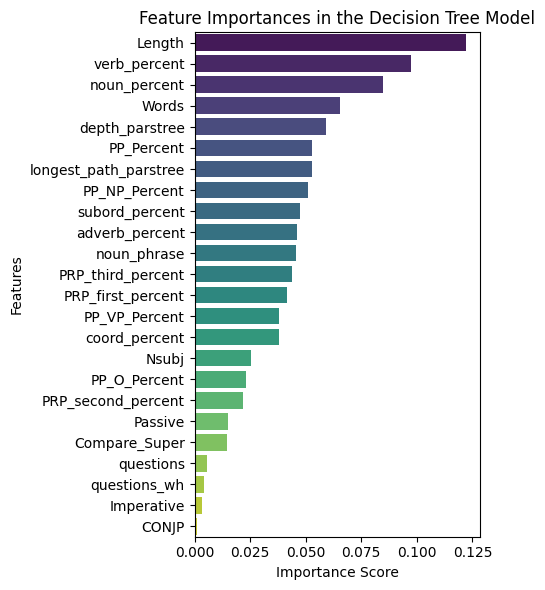

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

best_rf = rand_search_short_balanced.best_estimator_
feature_importance = best_rf.feature_importances_
feature_names = ['Length', 'Words', 'longest_path_parstree', 'depth_parstree', 'verb_percent', 'adverb_percent', 'noun_percent', 'coord_percent', 'subord_percent', 'questions', 'questions_wh', 'PRP_first_percent', 'PRP_second_percent', 'PRP_third_percent', 'noun_phrase', 'Passive', 'Compare_Super', 'CONJP', 'Imperative', 'Nsubj', 'PP_Percent', 'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent']  # Complete this list with all feature names

importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

sorted_importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(5, 6))
sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")

plt.title("Feature Importances in the Decision Tree Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
sorted_importances

,Feature,Importance
0,Length,0.122262
4,verb_percent,0.097173
6,noun_percent,0.084637
1,Words,0.065374
3,depth_parstree,0.059100
20,PP_Percent,0.052857
2,longest_path_parstree,0.052734
22,PP_NP_Percent,0.051236
8,subord_percent,0.047607
5,adverb_percent,0.045982


#### Random Forest (medium)

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
Dataset = Dataset_medium.reset_index(drop=True)

In [ ]:
Dataset = Dataset.drop(['Sentence'], axis=1)

In [ ]:
# Split the data into features (X) and target (y)
X = Dataset[['Length', 'Words', 'longest_path_parstree', 'depth_parstree', 'verb_percent', 'adverb_percent', 'noun_percent', 'coord_percent', 'subord_percent', 'questions', 'questions_wh', 'PRP_first_percent', 'PRP_second_percent', 'PRP_third_percent', 'noun_phrase', 'Passive', 'Compare_Super', 'CONJP', 'Imperative', 'Nsubj', 'PP_Percent', 'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent']]  # Complete this list with all feature names
y = Dataset['Label_num']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search_medium_balanced = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search_medium_balanced.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7acf8c707430>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7acf8c35acb0>})

In [ ]:
y_pred = rand_search_medium_balanced.predict(X_test)

In [ ]:
accuracy_medium_balanced = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_medium_balanced)

Accuracy: 0.6471394313120932


In [ ]:
# Create a variable for the best model
best_rf = rand_search_medium_balanced.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search_medium_balanced.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 173}


In [ ]:
from sklearn import metrics

accuracy_medium_balanced = metrics.accuracy_score(y_test, y_pred)
conf_matrix_medium_balanced = metrics.confusion_matrix(y_test, y_pred)
class_report_medium_balanced = metrics.classification_report(y_test, y_pred)

print("Improved Accuracy:", accuracy_medium_balanced)
print("Confusion Matrix:\n", conf_matrix_medium_balanced)
print("Classification Report:\n", class_report_medium_balanced)

Improved Accuracy: 0.6471394313120932
Confusion Matrix:
 [[1009  479]
 [ 551  880]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.68      0.66      1488
           1       0.65      0.61      0.63      1431

    accuracy                           0.65      2919
   macro avg       0.65      0.65      0.65      2919
weighted avg       0.65      0.65      0.65      2919



<ipython-input-170-ae6d68659a58>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")


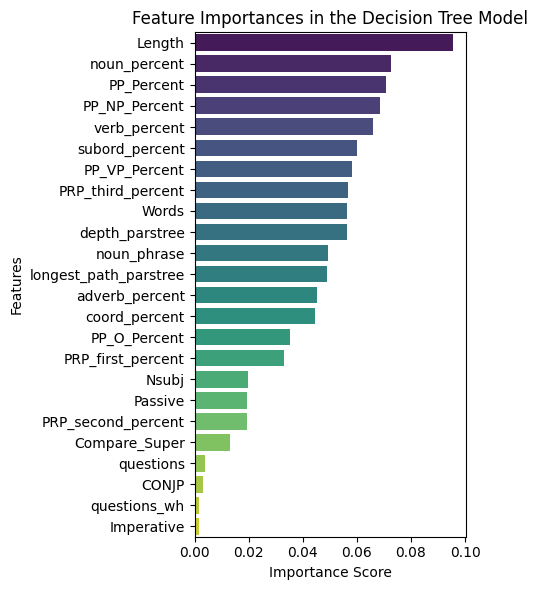

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

best_rf = rand_search_medium_balanced.best_estimator_
feature_importance = best_rf.feature_importances_
feature_names = ['Length', 'Words', 'longest_path_parstree', 'depth_parstree', 'verb_percent', 'adverb_percent', 'noun_percent', 'coord_percent', 'subord_percent', 'questions', 'questions_wh', 'PRP_first_percent', 'PRP_second_percent', 'PRP_third_percent', 'noun_phrase', 'Passive', 'Compare_Super', 'CONJP', 'Imperative', 'Nsubj', 'PP_Percent', 'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent']  # Complete this list with all feature names

importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

sorted_importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(5, 6))
sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")

plt.title("Feature Importances in the Decision Tree Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
sorted_importances

,Feature,Importance
0,Length,0.095567
6,noun_percent,0.072478
20,PP_Percent,0.070824
22,PP_NP_Percent,0.068424
4,verb_percent,0.065892
8,subord_percent,0.059888
21,PP_VP_Percent,0.058165
13,PRP_third_percent,0.056730
1,Words,0.056482
3,depth_parstree,0.056286


#### Random Forest (long)

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
Dataset = Dataset_long.reset_index(drop=True)

In [ ]:
Dataset = Dataset.drop(['Sentence'], axis=1)

In [ ]:
# Split the data into features (X) and target (y)
X = Dataset[['Length', 'Words', 'longest_path_parstree', 'depth_parstree', 'verb_percent', 'adverb_percent', 'noun_percent', 'coord_percent', 'subord_percent', 'questions', 'questions_wh', 'PRP_first_percent', 'PRP_second_percent', 'PRP_third_percent', 'noun_phrase', 'Passive', 'Compare_Super', 'CONJP', 'Imperative', 'Nsubj', 'PP_Percent', 'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent']]  # Complete this list with all feature names
y = Dataset['Label_num']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search_long_balanced = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search_long_balanced.fit(X_train, y_train)

In [ ]:
y_pred = rand_search_long_balanced.predict(X_test)

In [ ]:
accuracy_long_balanced = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_long_balanced)

In [ ]:
# Create a variable for the best model
best_rf = rand_search_long_balanced.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search_long_balanced.best_params_)

Best hyperparameters: {'max_depth': 17, 'n_estimators': 240}


In [ ]:
from sklearn import metrics

accuracy_long_balanced = metrics.accuracy_score(y_test, y_pred)
conf_matrix_long_balanced = metrics.confusion_matrix(y_test, y_pred)
class_report_long_balanced = metrics.classification_report(y_test, y_pred)

print("Improved Accuracy:", accuracy_long_balanced)
print("Confusion Matrix:\n", conf_matrix_long_balanced)
print("Classification Report:\n", class_report_long_balanced)

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

best_rf = rand_search_long_balanced.best_estimator_
feature_importance = best_rf.feature_importances_
feature_names = ['Length', 'Words', 'longest_path_parstree', 'depth_parstree', 'verb_percent', 'adverb_percent', 'noun_percent', 'coord_percent', 'subord_percent', 'questions', 'questions_wh', 'PRP_first_percent', 'PRP_second_percent', 'PRP_third_percent', 'noun_phrase', 'Passive', 'Compare_Super', 'CONJP', 'Imperative', 'Nsubj', 'PP_Percent', 'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent']  # Complete this list with all feature names

importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

sorted_importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(5, 6))
sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")

plt.title("Feature Importances in the Decision Tree Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
sorted_importances

#### Results

In [ ]:
# All:

print("Improved Accuracy:", accuracy_balanced)
print("Confusion Matrix:\n", conf_matrix_balanced)
print("Classification Report:\n", class_report_balanced)

In [ ]:
# Short:

print("Improved Accuracy:", accuracy_short_balanced)
print("Confusion Matrix:\n", conf_matrix_short_balanced)
print("Classification Report:\n", class_report_short_balanced)

In [ ]:
# Medium:

print("Improved Accuracy:", accuracy_medium_balanced)
print("Confusion Matrix:\n", conf_matrix_medium_balanced)
print("Classification Report:\n", class_report_medium_balanced)

In [ ]:
# Long:

print("Improved Accuracy:", accuracy_long_balanced)
print("Confusion Matrix:\n", conf_matrix_long_balanced)
print("Classification Report:\n", class_report_long_balanced)

Improved Accuracy: 0.7004025301897643
Confusion Matrix:
 [[711 257]
 [264 507]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       968
           1       0.66      0.66      0.66       771

    accuracy                           0.70      1739
   macro avg       0.70      0.70      0.70      1739
weighted avg       0.70      0.70      0.70      1739

Improved Accuracy: 0.7004025301897643
Confusion Matrix:
 [[711 257]
 [264 507]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       968
           1       0.66      0.66      0.66       771

    accuracy                           0.70      1739
   macro avg       0.70      0.70      0.70      1739
weighted avg       0.70      0.70      0.70      1739



## BERT

#### BERT (all)

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

In [ ]:
Dataset = Dataset_all

In [ ]:
# Spliting the Dataset to Train and Test sets:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Dataset['Sentence'],Dataset['Label_num'])

In [ ]:
pip install ktrain

In [ ]:
import ktrain
from ktrain import text

In [ ]:
(x_train, y_train), (x_test,y_test), preproc = text.texts_from_array(x_train=X_train.to_numpy(), y_train=y_train.to_numpy(),
                                                                     x_test= X_test.to_numpy(),  y_test= y_test.to_numpy(),
                                                                     class_names=['Spoken','Written'],
                                                                     preprocess_mode='bert',
                                                                     maxlen=150,
                                                                     max_features=35000)
#To solve the error add or remove: .to_numpy()

In [ ]:
model_all = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)
learner_all = ktrain.get_learner(model_all, train_data=(x_train, y_train), batch_size=6)

In [ ]:
learner_all.fit_onecycle(2e-5, 5)

In [ ]:
learner_all.validate(val_data=(x_test, y_test), class_names=['Spoken','Written'])

In [ ]:
predictor_BERT = ktrain.get_predictor(learner_all.model, preproc)

In [ ]:
# let's save the predictor for later use
predictor_BERT.save('/Predictor_BERT_all')

In [ ]:
'''from tensorflow.keras.models import load_model

loaded_BERT = load_model('/Predictor_BERT')'''

#### BERT (short)

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

In [ ]:
Dataset = Dataset_short

In [ ]:
# Spliting the Dataset to Train and Test sets:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Dataset['Sentence'],Dataset['Label_num'])

In [ ]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 48.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 44.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 57.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 27.3 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.41.4-py3-none-any.whl size=25316932 sha256=67824d7f2e1f

In [ ]:
import ktrain
from ktrain import text

In [ ]:
(x_train, y_train), (x_test,y_test), preproc = text.texts_from_array(x_train=X_train.to_numpy(), y_train=y_train.to_numpy(),
                                                                     x_test= X_test.to_numpy(),  y_test= y_test.to_numpy(),
                                                                     class_names=['Spoken','Written'],
                                                                     preprocess_mode='bert',
                                                                     maxlen=150,
                                                                     max_features=35000)
#To solve the error add or remove: .to_numpy()

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


In [ ]:
model_short = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)
learner_short = ktrain.get_learner(model_short, train_data=(x_train, y_train), batch_size=6)

Is Multi-Label? False
maxlen is 150


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [ ]:
learner_short.fit_onecycle(2e-5, 5)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/5
 829/2253 [==========>...................] - ETA: 32:37 - loss: 0.4618 - accuracy: 0.7782

In [ ]:
learner_short.validate(val_data=(x_test, y_test), class_names=['Spoken','Written'])

In [ ]:
predictor_BERT = ktrain.get_predictor(learner_short.model, preproc)

In [ ]:
# let's save the predictor for later use
predictor_BERT.save('/Predictor_BERT_short')

In [ ]:
'''from tensorflow.keras.models import load_model

loaded_BERT = load_model('/Predictor_BERT')'''

#### BERT (medium)

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

In [ ]:
Dataset = Dataset_medium

In [ ]:
# Spliting the Dataset to Train and Test sets:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Dataset['Sentence'],Dataset['Label_num'])

In [ ]:
pip install ktrain

In [ ]:
import ktrain
from ktrain import text

In [ ]:
(x_train, y_train), (x_test,y_test), preproc = text.texts_from_array(x_train=X_train.to_numpy(), y_train=y_train.to_numpy(),
                                                                     x_test= X_test.to_numpy(),  y_test= y_test.to_numpy(),
                                                                     class_names=['Spoken','Written'],
                                                                     preprocess_mode='bert',
                                                                     maxlen=150,
                                                                     max_features=35000)
#To solve the error add or remove: .to_numpy()

In [ ]:
model_medium = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)
learner_medium = ktrain.get_learner(model_medium, train_data=(x_train, y_train), batch_size=6)

In [ ]:
learner_medium.fit_onecycle(2e-5, 5)

In [ ]:
learner_medium.validate(val_data=(x_test, y_test), class_names=['Spoken','Written'])

In [ ]:
predictor_BERT = ktrain.get_predictor(learner_medium.model, preproc)

In [ ]:
# let's save the predictor for later use
predictor_BERT.save('/Predictor_medium')

In [ ]:
'''from tensorflow.keras.models import load_model

loaded_BERT = load_model('/Predictor_BERT')'''

#### BERT (long)

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

In [ ]:
Dataset = Dataset_long

In [ ]:
# Spliting the Dataset to Train and Test sets:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Dataset['Sentence'],Dataset['Label_num'])

In [ ]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 36.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 47.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 48.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 27.7 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.41.4-py3-none-any.whl size=25316932 sha256=1cfb54d83958

In [ ]:
import ktrain
from ktrain import text

In [ ]:
(x_train, y_train), (x_test,y_test), preproc = text.texts_from_array(x_train=X_train.to_numpy(), y_train=y_train.to_numpy(),
                                                                     x_test= X_test.to_numpy(),  y_test= y_test.to_numpy(),
                                                                     class_names=['Spoken','Written'],
                                                                     preprocess_mode='bert',
                                                                     maxlen=150,
                                                                     max_features=35000)
#To solve the error add or remove: .to_numpy()

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


In [ ]:
model_long = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)
learner_long = ktrain.get_learner(model_long, train_data=(x_train, y_train), batch_size=6)

Is Multi-Label? False
maxlen is 150


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [ ]:
learner_long.fit_onecycle(2e-5, 5)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/5
1087/1087 [==============================] - 1469s 1s/step - loss: 0.3284 - accuracy: 0.8621
Epoch 2/5
1087/1087 [==============================] - 1415s 1s/step - loss: 0.1732 - accuracy: 0.9337
Epoch 3/5
1087/1087 [==============================] - 1415s 1s/step - loss: 0.0886 - accuracy: 0.9667
Epoch 4/5
1087/1087 [==============================] - 1417s 1s/step - loss: 0.0261 - accuracy: 0.9914
Epoch 5/5
1087/1087 [==============================] - 1418s 1s/step - loss: 0.0043 - accuracy: 0.9992


In [ ]:
learner_long.validate(val_data=(x_test, y_test), class_names=['Spoken','Written'])

68/68 [==============================] - 107s 2s/step
              precision    recall  f1-score   support

      Spoken       0.93      0.96      0.94      1167
     Written       0.95      0.92      0.93      1007

    accuracy                           0.94      2174
   macro avg       0.94      0.94      0.94      2174
weighted avg       0.94      0.94      0.94      2174



array([[1119,   48],
       [  84,  923]])

In [ ]:
predictor_BERT = ktrain.get_predictor(learner_long.model, preproc)

In [ ]:
# let's save the predictor for later use
predictor_BERT.save('/Predictor_BERT_long')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
'''from tensorflow.keras.models import load_model

loaded_BERT = load_model('/Predictor_BERT')'''

"from tensorflow.keras.models import load_model\n\nloaded_BERT = load_model('/Predictor_BERT')"

"from tensorflow.keras.models import load_model\n\nloaded_BERT = load_model('/Predictor_BERT')"

#### Results

# Experiment 2

In [ ]:
# Different Features

### Dividing Features

In [ ]:
dataset.loc[0]

,0
Label,Written
Label_num,1
Sentence,Convinced that the treaty was a plot hatched b...
Length,0.334
Words,0.304
depth_parstree,0.246
longest_path_parstree,0.361
verb_percent,0.13
adverb_percent,0.04
noun_percent,0.32


In [ ]:
Dataset_all = dataset

In [ ]:
old_feature = ['Label', 'Label_num', 'Sentence', 'Length',	'Words', 'depth_parstree', 'longest_path_parstree', 'noun_phrase', 'noun_percent', 'verb_percent', 'adverb_percent', 'subord_percent', 'coord_percent', 'PRP_first_percent', 'PRP_second_percent', 'PRP_third_percent', 'questions', 'questions_wh']

Dataset_old = dataset[old_feature]

In [ ]:
new_feature = ['Label', 'Label_num', 'Sentence', 'Passive',	'Compare_Super', 'CONJP', 'Imperative', 'Nsubj', 'PP_Percent', 'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent']

Dataset_new = dataset[new_feature]

### SVMs

#### SVM (Old)

In [ ]:
Dataset = Dataset_old

In [ ]:
Dataset = Dataset.drop(['Sentence'], axis=1)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
X = []

for i in range(len(Dataset)):
    X.append([Dataset['Length'][i],
              Dataset['Words'][i],
              Dataset['depth_parstree'][i],
              Dataset['longest_path_parstree'][i],
              Dataset['noun_phrase'][i],
              Dataset['noun_percent'][i],
              Dataset['verb_percent'][i],
              Dataset['adverb_percent'][i],
              Dataset['coord_percent'][i],
              Dataset['subord_percent'][i],
              Dataset['PRP_first_percent'][i],
              Dataset['PRP_second_percent'][i],
              Dataset['PRP_third_percent'][i],
              Dataset['questions'][i],
              Dataset['questions_wh'][i]])

del i

X = np.array(X)
X


array([[0.334, 0.304, 0.246, ..., 0.   , 0.   , 0.   ],
       [0.03 , 0.027, 0.035, ..., 0.   , 0.   , 0.   ],
       [0.23 , 0.272, 0.211, ..., 0.02 , 0.   , 0.   ],
       ...,
       [0.24 , 0.299, 0.14 , ..., 0.03 , 0.   , 0.   ],
       [0.082, 0.103, 0.123, ..., 0.   , 0.   , 0.   ],
       [0.164, 0.125, 0.175, ..., 0.03 , 0.   , 0.   ]])

In [ ]:
y = np.array(Dataset['Label_num'])
y

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
# Using np.bincount to count occurrences of 0 and 1
counts = np.bincount(y)

# The counts array will have the count of 0s at index 0 and the count of 1s at index 1
count_zeros = counts[0]
count_ones = counts[1]

print("Number of 0s:", count_zeros)
print("Number of 1s:", count_ones)

Number of 0s: 20654
Number of 1s: 20652


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
#Build the model
svm_old = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm_old.fit(X_train, y_train)

SVC(gamma=0.5)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = svm_old.predict(X_test)

accuracy_old = accuracy_score(y_test, y_pred)
conf_matrix_old = confusion_matrix(y_test, y_pred)
class_report_old = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy_old)
print("Confusion Matrix:\n", conf_matrix_old)
print("Classification Report:\n", class_report_old)

Accuracy: 0.6069958847736625
Confusion Matrix:
 [[2746 1333]
 [1914 2269]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.67      0.63      4079
           1       0.63      0.54      0.58      4183

    accuracy                           0.61      8262
   macro avg       0.61      0.61      0.61      8262
weighted avg       0.61      0.61      0.61      8262



#### SVM (New)

In [ ]:
Dataset = Dataset_new

In [ ]:
Dataset

,Label,Label_num,Sentence,Passive,Compare_Super,CONJP,Imperative,Nsubj,PP_Percent,PP_VP_Percent,PP_NP_Percent,PP_O_Percent
0,Written,1,Convinced that the treaty was a plot hatched b...,1.0,1.0,0.0,0.0,1.0,0.35,0.12,0.14,0.09
1,Written,1,without decent and refined language.,1.0,1.0,0.0,0.0,0.0,0.83,0.00,0.00,0.83
2,Written,1,Only after I had hung up and she turned toward...,1.0,1.0,0.0,0.0,0.5,0.20,0.04,0.16,0.00
3,Written,1,"I sensed, though, that at some stage—maybe whe...",1.0,1.0,0.0,0.0,0.5,0.35,0.18,0.14,0.03
4,Spoken,0,"Sundry treaties have been negotiated, which wi...",0.0,1.0,0.0,0.0,0.0,0.48,0.33,0.14,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
41301,Spoken,0,The other members of this committee will be Mr...,1.0,1.0,0.0,0.0,1.0,0.09,0.00,0.09,0.00
41302,Spoken,0,Now the first question is from Mr. McGee and i...,1.0,1.0,0.0,0.0,1.0,0.43,0.43,0.00,0.00
41303,Written,1,Synthetic-fabric “drip-dry” shirts were availa...,1.0,1.0,0.0,0.0,1.0,0.29,0.14,0.14,0.00
41304,Spoken,0,"We are tougher than the times we live in, and ...",1.0,0.0,0.0,0.0,0.5,0.05,0.05,0.00,0.00


In [ ]:
Dataset = Dataset.drop(['Sentence'], axis=1)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
X = []

for i in range(len(Dataset)):
    X.append([Dataset['Passive'][i],
              Dataset['Compare_Super'][i],
              Dataset['CONJP'][i],
              Dataset['Imperative'][i],
              Dataset['Nsubj'][i],
              Dataset['PP_Percent'][i],
              Dataset['PP_VP_Percent'][i],
              Dataset['PP_NP_Percent'][i],
              Dataset['PP_O_Percent'][i]]
             )


del i

X = np.array(X)
X


array([[1.  , 1.  , 0.  , ..., 0.12, 0.14, 0.09],
       [1.  , 1.  , 0.  , ..., 0.  , 0.  , 0.83],
       [1.  , 1.  , 0.  , ..., 0.04, 0.16, 0.  ],
       ...,
       [1.  , 1.  , 0.  , ..., 0.14, 0.14, 0.  ],
       [1.  , 0.  , 0.  , ..., 0.05, 0.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.25, 0.12, 0.12]])

In [ ]:
y = np.array(Dataset['Label_num'])
y

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
# Using np.bincount to count occurrences of 0 and 1
counts = np.bincount(y)

# The counts array will have the count of 0s at index 0 and the count of 1s at index 1
count_zeros = counts[0]
count_ones = counts[1]

print("Number of 0s:", count_zeros)
print("Number of 1s:", count_ones)

Number of 0s: 20654
Number of 1s: 20652


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
#Build the model
svm_new = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm_new.fit(X_train, y_train)

SVC(gamma=0.5)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = svm_new.predict(X_test)

accuracy_new = accuracy_score(y_test, y_pred)
conf_matrix_new = confusion_matrix(y_test, y_pred)
class_report_new = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy_new)
print("Confusion Matrix:\n", conf_matrix_new)
print("Classification Report:\n", class_report_new)

Accuracy: 0.575284434761559
Confusion Matrix:
 [[2308 1771]
 [1738 2445]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.57      0.57      4079
           1       0.58      0.58      0.58      4183

    accuracy                           0.58      8262
   macro avg       0.58      0.58      0.58      8262
weighted avg       0.58      0.58      0.58      8262



#### SVM (all)

In [ ]:
Dataset = Dataset_all

In [ ]:
Dataset = Dataset.drop(['Sentence'], axis=1)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
X = []

for i in range(len(Dataset)):
    X.append([Dataset['Length'][i],
              Dataset['Words'][i],
              Dataset['depth_parstree'][i],
              Dataset['longest_path_parstree'][i],
              Dataset['noun_phrase'][i],
              Dataset['noun_percent'][i],
              Dataset['verb_percent'][i],
              Dataset['adverb_percent'][i],
              Dataset['coord_percent'][i],
              Dataset['subord_percent'][i],
              Dataset['PRP_first_percent'][i],
              Dataset['PRP_second_percent'][i],
              Dataset['PRP_third_percent'][i],
              Dataset['questions'][i],
              Dataset['questions_wh'][i],
              Dataset['Passive'][i],
              Dataset['Compare_Super'][i],
              Dataset['CONJP'][i],
              Dataset['Imperative'][i],
              Dataset['Nsubj'][i],
              Dataset['PP_Percent'][i],
              Dataset['PP_VP_Percent'][i],
              Dataset['PP_NP_Percent'][i],
              Dataset['PP_O_Percent'][i]]
             )


del i

X = np.array(X)
X


array([[0.334, 0.304, 0.246, ..., 0.12 , 0.14 , 0.09 ],
       [0.03 , 0.027, 0.035, ..., 0.   , 0.   , 0.83 ],
       [0.23 , 0.272, 0.211, ..., 0.04 , 0.16 , 0.   ],
       ...,
       [0.24 , 0.299, 0.14 , ..., 0.14 , 0.14 , 0.   ],
       [0.082, 0.103, 0.123, ..., 0.05 , 0.   , 0.   ],
       [0.164, 0.125, 0.175, ..., 0.25 , 0.12 , 0.12 ]])

In [ ]:
y = np.array(Dataset['Label_num'])
y

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
# Using np.bincount to count occurrences of 0 and 1
counts = np.bincount(y)

# The counts array will have the count of 0s at index 0 and the count of 1s at index 1
count_zeros = counts[0]
count_ones = counts[1]

print("Number of 0s:", count_zeros)
print("Number of 1s:", count_ones)

Number of 0s: 20654
Number of 1s: 20652


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
#Build the model
svm_all = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm_all.fit(X_train, y_train)

SVC(gamma=0.5)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = svm_all.predict(X_test)

accuracy_all = accuracy_score(y_test, y_pred)
conf_matrix_all = confusion_matrix(y_test, y_pred)
class_report_all = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy_all)
print("Confusion Matrix:\n", conf_matrix_all)
print("Classification Report:\n", class_report_all)

Accuracy: 0.6218833212297264
Confusion Matrix:
 [[2656 1423]
 [1701 2482]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.65      0.63      4079
           1       0.64      0.59      0.61      4183

    accuracy                           0.62      8262
   macro avg       0.62      0.62      0.62      8262
weighted avg       0.62      0.62      0.62      8262



#### Results

In [ ]:
# Display the results

print("Accuracy:", accuracy_old)
print("Confusion Matrix:\n", conf_matrix_old)
print("Classification Report:\n", class_report_old)

Accuracy: 0.6069958847736625
Confusion Matrix:
 [[2746 1333]
 [1914 2269]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.67      0.63      4079
           1       0.63      0.54      0.58      4183

    accuracy                           0.61      8262
   macro avg       0.61      0.61      0.61      8262
weighted avg       0.61      0.61      0.61      8262



In [ ]:
# Display the results

print("Accuracy:", accuracy_new)
print("Confusion Matrix:\n", conf_matrix_new)
print("Classification Report:\n", class_report_new)

Accuracy: 0.575284434761559
Confusion Matrix:
 [[2308 1771]
 [1738 2445]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.57      0.57      4079
           1       0.58      0.58      0.58      4183

    accuracy                           0.58      8262
   macro avg       0.58      0.58      0.58      8262
weighted avg       0.58      0.58      0.58      8262



In [ ]:
# Display the results

print("Accuracy:", accuracy_all)
print("Confusion Matrix:\n", conf_matrix_all)
print("Classification Report:\n", class_report_all)

Accuracy: 0.6218833212297264
Confusion Matrix:
 [[2656 1423]
 [1701 2482]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.65      0.63      4079
           1       0.64      0.59      0.61      4183

    accuracy                           0.62      8262
   macro avg       0.62      0.62      0.62      8262
weighted avg       0.62      0.62      0.62      8262



### Decision Tree

#### Decision Tree (old)

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
import numpy as np

In [ ]:
Dataset = Dataset_old

In [ ]:
Dataset = Dataset.drop(['Sentence'], axis=1)

In [ ]:
X = []

for i in range(len(Dataset)):
    X.append([Dataset['Length'][i],
              Dataset['Words'][i],
              Dataset['depth_parstree'][i],
              Dataset['longest_path_parstree'][i],
              Dataset['noun_phrase'][i],
              Dataset['noun_percent'][i],
              Dataset['verb_percent'][i],
              Dataset['adverb_percent'][i],
              Dataset['coord_percent'][i],
              Dataset['subord_percent'][i],
              Dataset['PRP_first_percent'][i],
              Dataset['PRP_second_percent'][i],
              Dataset['PRP_third_percent'][i],
              Dataset['questions'][i],
              Dataset['questions_wh'][i]])

del i

X = np.array(X)
X


array([[0.334, 0.304, 0.246, ..., 0.   , 0.   , 0.   ],
       [0.03 , 0.027, 0.035, ..., 0.   , 0.   , 0.   ],
       [0.23 , 0.272, 0.211, ..., 0.02 , 0.   , 0.   ],
       ...,
       [0.24 , 0.299, 0.14 , ..., 0.03 , 0.   , 0.   ],
       [0.082, 0.103, 0.123, ..., 0.   , 0.   , 0.   ],
       [0.164, 0.125, 0.175, ..., 0.03 , 0.   , 0.   ]])

In [ ]:
X[1]

array([0.03 , 0.027, 0.035, 0.049, 0.011, 0.2  , 0.   , 0.   , 0.2  ,
       0.2  , 0.   , 0.   , 0.   , 0.   , 0.   ])

In [ ]:
y = np.array(Dataset['Label_num'])
y

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf_old = DecisionTreeClassifier()

clf_old.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf_old.predict(X_test)

In [ ]:
from sklearn import metrics

accuracy_old = metrics.accuracy_score(y_test, y_pred)
conf_matrix_old = metrics.confusion_matrix(y_test, y_pred)
class_report_old = metrics.classification_report(y_test, y_pred)

print("Improved Accuracy:", accuracy_old)
print("Confusion Matrix:\n", conf_matrix_old)
print("Classification Report:\n", class_report_old)

Improved Accuracy: 0.5691115952553861
Confusion Matrix:
 [[2284 1795]
 [1765 2418]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.56      0.56      4079
           1       0.57      0.58      0.58      4183

    accuracy                           0.57      8262
   macro avg       0.57      0.57      0.57      8262
weighted avg       0.57      0.57      0.57      8262



In [ ]:
pip install seaborn

<ipython-input-342-a89272b7493c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")


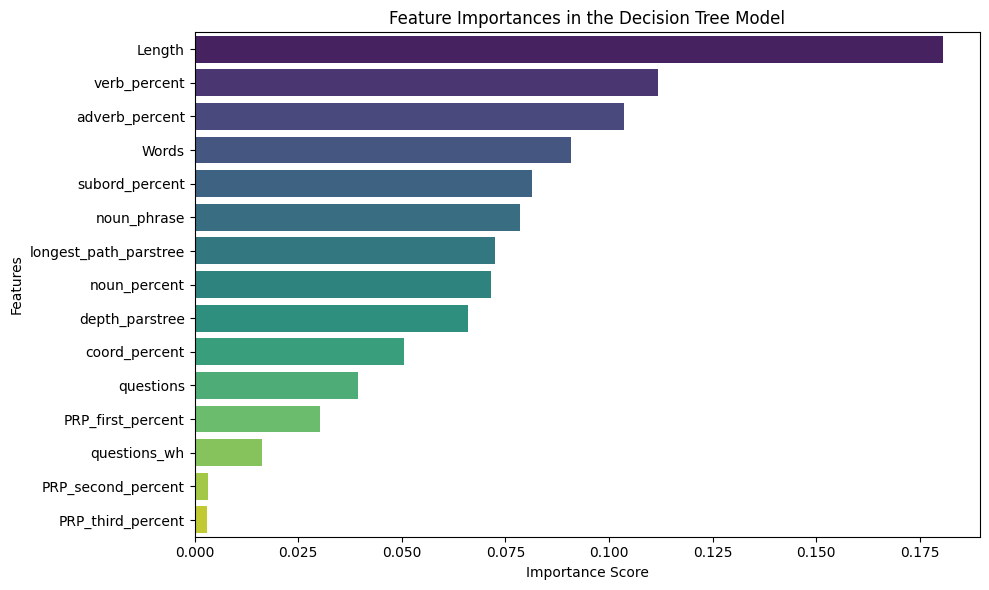

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = clf_old.feature_importances_
feature_names = ['Length', 'Words', 'depth_parstree', 'longest_path_parstree', 'noun_phrase', 'verb_percent', 'adverb_percent', 'noun_percent', 'coord_percent', 'subord_percent', 'questions', 'questions_wh', 'PRP_first_percent', 'PRP_second_percent', 'PRP_third_percent']  # Complete this list with all feature names

importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

sorted_importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")

plt.title("Feature Importances in the Decision Tree Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


#### Decision Tree (new)

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
import numpy as np

In [ ]:
Dataset = Dataset_new

In [ ]:
Dataset = Dataset.drop(['Sentence'], axis=1)

In [ ]:
X = []

for i in range(len(Dataset)):
    X.append([Dataset['Passive'][i],
              Dataset['Compare_Super'][i],
              Dataset['CONJP'][i],
              Dataset['Imperative'][i],
              Dataset['Nsubj'][i],
              Dataset['PP_Percent'][i],
              Dataset['PP_VP_Percent'][i],
              Dataset['PP_NP_Percent'][i],
              Dataset['PP_O_Percent'][i]]
             )


del i

X = np.array(X)
X


array([[1.  , 1.  , 0.  , ..., 0.12, 0.14, 0.09],
       [1.  , 1.  , 0.  , ..., 0.  , 0.  , 0.83],
       [1.  , 1.  , 0.  , ..., 0.04, 0.16, 0.  ],
       ...,
       [1.  , 1.  , 0.  , ..., 0.14, 0.14, 0.  ],
       [1.  , 0.  , 0.  , ..., 0.05, 0.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.25, 0.12, 0.12]])

In [ ]:
X[1]

array([1.  , 1.  , 0.  , 0.  , 0.  , 0.83, 0.  , 0.  , 0.83])

In [ ]:
y = np.array(Dataset['Label_num'])
y

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf_new = DecisionTreeClassifier()

clf_new.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf_new.predict(X_test)

In [ ]:
from sklearn import metrics

accuracy_new = metrics.accuracy_score(y_test, y_pred)
conf_matrix_new = metrics.confusion_matrix(y_test, y_pred)
class_report_new = metrics.classification_report(y_test, y_pred)

print("Improved Accuracy:", accuracy_new)
print("Confusion Matrix:\n", conf_matrix_new)
print("Classification Report:\n", class_report_new)

Improved Accuracy: 0.547446138949407
Confusion Matrix:
 [[1998 2081]
 [1658 2525]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.49      0.52      4079
           1       0.55      0.60      0.57      4183

    accuracy                           0.55      8262
   macro avg       0.55      0.55      0.55      8262
weighted avg       0.55      0.55      0.55      8262



In [ ]:
pip install seaborn

<ipython-input-354-9fd971b9a48e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")


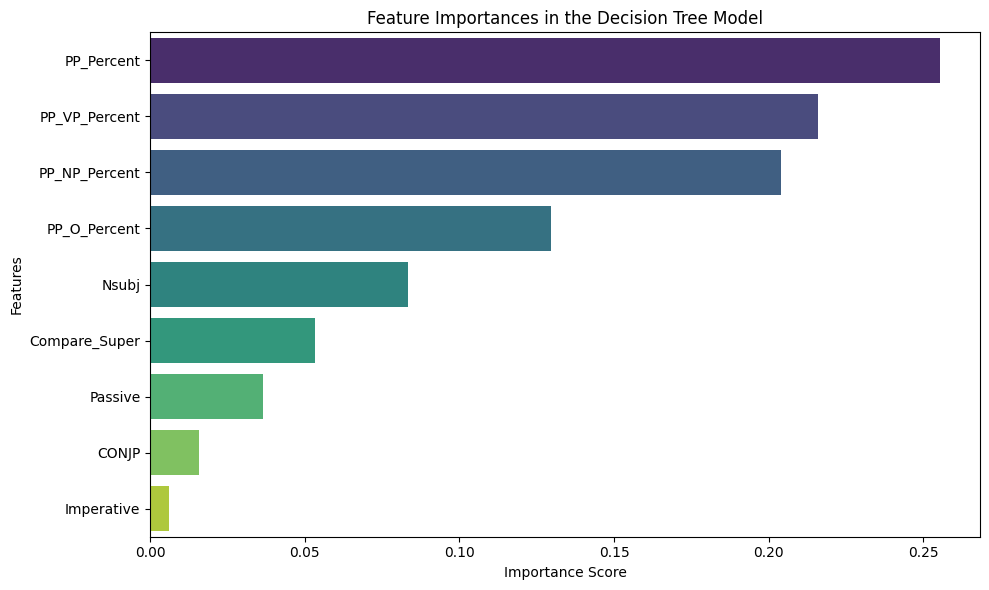

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = clf_new.feature_importances_
feature_names = ['Passive', 'Compare_Super', 'CONJP', 'Imperative', 'Nsubj', 'PP_Percent', 'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent']  # Complete this list with all feature names

importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

sorted_importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")

plt.title("Feature Importances in the Decision Tree Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


#### Decision Tree (all)

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
import numpy as np

In [ ]:
Dataset = Dataset_all

In [ ]:
Dataset = Dataset.drop(['Sentence'], axis=1)

In [ ]:
X = []

for i in range(len(Dataset)):
    X.append([Dataset['Length'][i],
              Dataset['Words'][i],
              Dataset['depth_parstree'][i],
              Dataset['longest_path_parstree'][i],
              Dataset['noun_phrase'][i],
              Dataset['noun_percent'][i],
              Dataset['verb_percent'][i],
              Dataset['adverb_percent'][i],
              Dataset['coord_percent'][i],
              Dataset['subord_percent'][i],
              Dataset['PRP_first_percent'][i],
              Dataset['PRP_second_percent'][i],
              Dataset['PRP_third_percent'][i],
              Dataset['questions'][i],
              Dataset['questions_wh'][i],
              Dataset['Passive'][i],
              Dataset['Compare_Super'][i],
              Dataset['CONJP'][i],
              Dataset['Imperative'][i],
              Dataset['Nsubj'][i],
              Dataset['PP_Percent'][i],
              Dataset['PP_VP_Percent'][i],
              Dataset['PP_NP_Percent'][i],
              Dataset['PP_O_Percent'][i]])

del i

X = np.array(X)
X


array([[0.334, 0.304, 0.246, ..., 0.12 , 0.14 , 0.09 ],
       [0.03 , 0.027, 0.035, ..., 0.   , 0.   , 0.83 ],
       [0.23 , 0.272, 0.211, ..., 0.04 , 0.16 , 0.   ],
       ...,
       [0.24 , 0.299, 0.14 , ..., 0.14 , 0.14 , 0.   ],
       [0.082, 0.103, 0.123, ..., 0.05 , 0.   , 0.   ],
       [0.164, 0.125, 0.175, ..., 0.25 , 0.12 , 0.12 ]])

In [ ]:
X[1]

array([0.03 , 0.027, 0.035, 0.049, 0.011, 0.2  , 0.   , 0.   , 0.2  ,
       0.2  , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 1.   , 0.   ,
       0.   , 0.   , 0.83 , 0.   , 0.   , 0.83 ])

In [ ]:
y = np.array(Dataset['Label_num'])
y

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf_all = DecisionTreeClassifier()

clf_all.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf_all.predict(X_test)

In [ ]:
from sklearn import metrics

accuracy_all = metrics.accuracy_score(y_test, y_pred)
conf_matrix_all = metrics.confusion_matrix(y_test, y_pred)
class_report_all = metrics.classification_report(y_test, y_pred)

print("Improved Accuracy:", accuracy_all)
print("Confusion Matrix:\n", conf_matrix_all)
print("Classification Report:\n", class_report_all)

Improved Accuracy: 0.5697167755991286
Confusion Matrix:
 [[2340 1739]
 [1816 2367]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.57      0.57      4079
           1       0.58      0.57      0.57      4183

    accuracy                           0.57      8262
   macro avg       0.57      0.57      0.57      8262
weighted avg       0.57      0.57      0.57      8262



In [ ]:
pip install seaborn

<ipython-input-366-38fb49092b97>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")


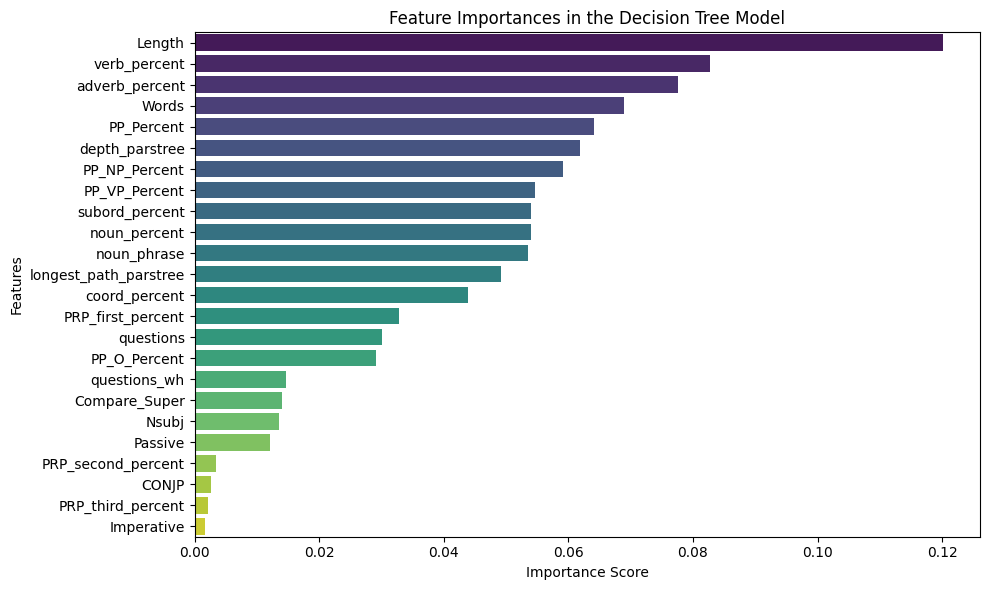

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = clf_all.feature_importances_
feature_names = ['Length', 'Words', 'depth_parstree', 'longest_path_parstree', 'noun_phrase', 'verb_percent', 'adverb_percent', 'noun_percent', 'coord_percent', 'subord_percent', 'questions', 'questions_wh', 'PRP_first_percent', 'PRP_second_percent', 'PRP_third_percent', 'Passive', 'Compare_Super', 'CONJP', 'Imperative', 'Nsubj', 'PP_Percent', 'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent']  # Complete this list with all feature names


importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

sorted_importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")

plt.title("Feature Importances in the Decision Tree Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


#### Results

In [ ]:
# Display the results

print("Accuracy:", accuracy_old)
print("Confusion Matrix:\n", conf_matrix_old)
print("Classification Report:\n", class_report_old)

Accuracy: 0.5691115952553861
Confusion Matrix:
 [[2284 1795]
 [1765 2418]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.56      0.56      4079
           1       0.57      0.58      0.58      4183

    accuracy                           0.57      8262
   macro avg       0.57      0.57      0.57      8262
weighted avg       0.57      0.57      0.57      8262



In [ ]:
# Display the results

print("Accuracy:", accuracy_new)
print("Confusion Matrix:\n", conf_matrix_new)
print("Classification Report:\n", class_report_new)

Accuracy: 0.547446138949407
Confusion Matrix:
 [[1998 2081]
 [1658 2525]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.49      0.52      4079
           1       0.55      0.60      0.57      4183

    accuracy                           0.55      8262
   macro avg       0.55      0.55      0.55      8262
weighted avg       0.55      0.55      0.55      8262



In [ ]:
# Display the results

print("Accuracy:", accuracy_all)
print("Confusion Matrix:\n", conf_matrix_all)
print("Classification Report:\n", class_report_all)

Accuracy: 0.5697167755991286
Confusion Matrix:
 [[2340 1739]
 [1816 2367]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.57      0.57      4079
           1       0.58      0.57      0.57      4183

    accuracy                           0.57      8262
   macro avg       0.57      0.57      0.57      8262
weighted avg       0.57      0.57      0.57      8262



### Random Forest

#### Random Forest (old)

In [ ]:
!pip install graphviz

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
Dataset = Dataset_old

In [ ]:
Dataset = Dataset.drop(['Sentence'], axis=1)

In [ ]:
# Split the data into features (X) and target (y)

X = Dataset[['Length', 'Words', 'depth_parstree', 'longest_path_parstree', 'noun_phrase', 'verb_percent', 'adverb_percent', 'noun_percent', 'coord_percent', 'subord_percent', 'questions', 'questions_wh', 'PRP_first_percent', 'PRP_second_percent', 'PRP_third_percent']]  # Complete this list with all feature names
y = Dataset['Label_num']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
random_forest_old = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
random_forest_old.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7acf8c155000>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7acf8c154280>})

In [ ]:
y_pred = random_forest_old.predict(X_test)

In [ ]:
accuracy_old = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_old)

Accuracy: 0.6362866134107964


In [ ]:
# Create a variable for the best model
best_rf = random_forest_old.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  random_forest_old.best_params_)

Best hyperparameters: {'max_depth': 19, 'n_estimators': 259}


In [ ]:
from sklearn import metrics

accuracy_old = metrics.accuracy_score(y_test, y_pred)
conf_matrix_old = metrics.confusion_matrix(y_test, y_pred)
class_report_old = metrics.classification_report(y_test, y_pred)

print("Improved Accuracy:", accuracy_old)
print("Confusion Matrix:\n", conf_matrix_old)
print("Classification Report:\n", class_report_old)

Improved Accuracy: 0.6362866134107964
Confusion Matrix:
 [[2813 1266]
 [1739 2444]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.69      0.65      4079
           1       0.66      0.58      0.62      4183

    accuracy                           0.64      8262
   macro avg       0.64      0.64      0.64      8262
weighted avg       0.64      0.64      0.64      8262



<ipython-input-380-af14ca99095d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")


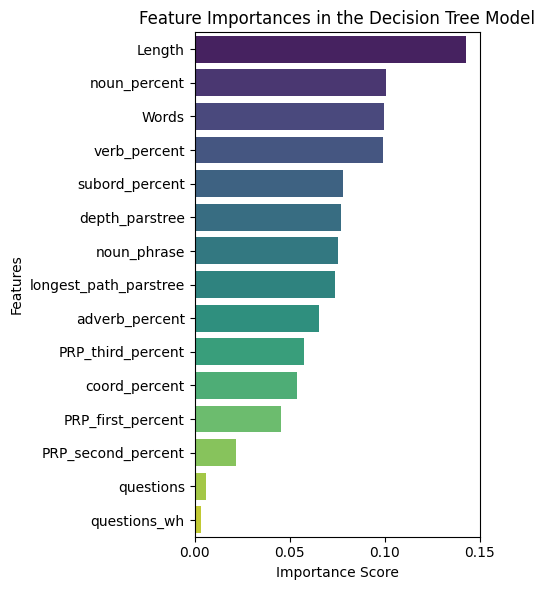

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

best_rf = random_forest_old.best_estimator_
feature_importance = best_rf.feature_importances_
feature_names = ['Length', 'Words', 'depth_parstree', 'longest_path_parstree', 'noun_phrase', 'verb_percent', 'adverb_percent', 'noun_percent', 'coord_percent', 'subord_percent', 'questions', 'questions_wh', 'PRP_first_percent', 'PRP_second_percent', 'PRP_third_percent']

importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

sorted_importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(5, 6))
sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")

plt.title("Feature Importances in the Decision Tree Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


#### Random Forest (new)

In [ ]:
!pip install graphviz

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
Dataset = Dataset_new

In [ ]:
Dataset = Dataset.drop(['Sentence'], axis=1)

In [ ]:
# Split the data into features (X) and target (y)

X = Dataset[['Passive', 'Compare_Super', 'CONJP', 'Imperative', 'Nsubj', 'PP_Percent', 'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent']]  # Complete this list with all feature names
y = Dataset['Label_num']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
random_forest_new = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
random_forest_new.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7acf8c468fd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7acf8cb72320>})

In [ ]:
y_pred = random_forest_new.predict(X_test)

In [ ]:
accuracy_new = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_new)

Accuracy: 0.5801258775114985


In [ ]:
# Create a variable for the best model
best_rf = random_forest_new.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  random_forest_new.best_params_)

Best hyperparameters: {'max_depth': 6, 'n_estimators': 110}


In [ ]:
from sklearn import metrics

accuracy_new = metrics.accuracy_score(y_test, y_pred)
conf_matrix_new = metrics.confusion_matrix(y_test, y_pred)
class_report_new = metrics.classification_report(y_test, y_pred)

print("Improved Accuracy:", accuracy_new)
print("Confusion Matrix:\n", conf_matrix_new)
print("Classification Report:\n", class_report_new)

Improved Accuracy: 0.5801258775114985
Confusion Matrix:
 [[2133 1946]
 [1523 2660]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.52      0.55      4079
           1       0.58      0.64      0.61      4183

    accuracy                           0.58      8262
   macro avg       0.58      0.58      0.58      8262
weighted avg       0.58      0.58      0.58      8262



<ipython-input-391-c16ef30c1f69>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")


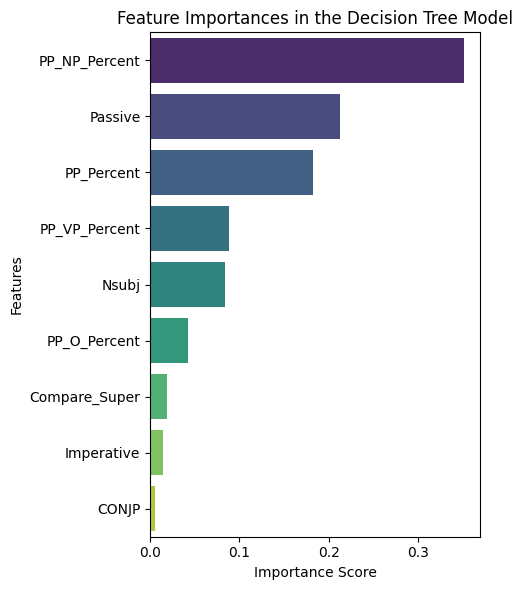

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

best_rf = random_forest_new.best_estimator_
feature_importance = best_rf.feature_importances_
feature_names = ['Passive', 'Compare_Super', 'CONJP', 'Imperative', 'Nsubj', 'PP_Percent', 'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent']

importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

sorted_importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(5, 6))
sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")

plt.title("Feature Importances in the Decision Tree Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


#### Random Forest (all)

In [ ]:
!pip install graphviz

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
Dataset = Dataset_all

In [ ]:
Dataset = Dataset.drop(['Sentence'], axis=1)

In [ ]:
# Split the data into features (X) and target (y)

X = Dataset[['Length', 'Words', 'depth_parstree', 'longest_path_parstree', 'noun_phrase', 'verb_percent', 'adverb_percent', 'noun_percent', 'coord_percent', 'subord_percent', 'questions', 'questions_wh', 'PRP_first_percent', 'PRP_second_percent', 'PRP_third_percent','Passive', 'Compare_Super', 'CONJP', 'Imperative', 'Nsubj', 'PP_Percent', 'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent']]  # Complete this list with all feature names
y = Dataset['Label_num']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
random_forest_all = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
random_forest_all.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ad032f32fb0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7acf8abd05e0>})

In [ ]:
y_pred = random_forest_all.predict(X_test)

In [ ]:
accuracy_all = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_all)

Accuracy: 0.6418542725732268


In [ ]:
# Create a variable for the best model
best_rf = random_forest_all.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  random_forest_all.best_params_)

Best hyperparameters: {'max_depth': 17, 'n_estimators': 149}


In [ ]:
from sklearn import metrics

accuracy_all = metrics.accuracy_score(y_test, y_pred)
conf_matrix_all = metrics.confusion_matrix(y_test, y_pred)
class_report_all = metrics.classification_report(y_test, y_pred)

print("Improved Accuracy:", accuracy_all)
print("Confusion Matrix:\n", conf_matrix_all)
print("Classification Report:\n", class_report_all)

Improved Accuracy: 0.6418542725732268
Confusion Matrix:
 [[2730 1349]
 [1610 2573]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.67      0.65      4079
           1       0.66      0.62      0.63      4183

    accuracy                           0.64      8262
   macro avg       0.64      0.64      0.64      8262
weighted avg       0.64      0.64      0.64      8262



<ipython-input-402-3d648d1997ca>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")


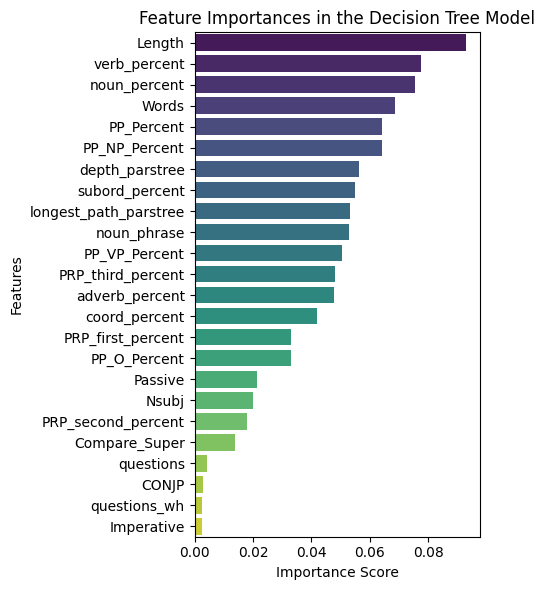

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

best_rf = random_forest_all.best_estimator_
feature_importance = best_rf.feature_importances_
feature_names = ['Length', 'Words', 'depth_parstree', 'longest_path_parstree', 'noun_phrase', 'verb_percent', 'adverb_percent', 'noun_percent', 'coord_percent', 'subord_percent', 'questions', 'questions_wh', 'PRP_first_percent', 'PRP_second_percent', 'PRP_third_percent', 'Passive', 'Compare_Super', 'CONJP', 'Imperative', 'Nsubj', 'PP_Percent', 'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent']

importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

sorted_importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(5, 6))
sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")

plt.title("Feature Importances in the Decision Tree Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


#### Results

In [ ]:
# Display the results

print("Accuracy:", accuracy_old)
print("Confusion Matrix:\n", conf_matrix_old)
print("Classification Report:\n", class_report_old)

Accuracy: 0.6362866134107964
Confusion Matrix:
 [[2813 1266]
 [1739 2444]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.69      0.65      4079
           1       0.66      0.58      0.62      4183

    accuracy                           0.64      8262
   macro avg       0.64      0.64      0.64      8262
weighted avg       0.64      0.64      0.64      8262



In [ ]:
# Display the results

print("Accuracy:", accuracy_new)
print("Confusion Matrix:\n", conf_matrix_new)
print("Classification Report:\n", class_report_new)

Accuracy: 0.5801258775114985
Confusion Matrix:
 [[2133 1946]
 [1523 2660]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.52      0.55      4079
           1       0.58      0.64      0.61      4183

    accuracy                           0.58      8262
   macro avg       0.58      0.58      0.58      8262
weighted avg       0.58      0.58      0.58      8262



In [ ]:
# Display the results

print("Accuracy:", accuracy_all)
print("Confusion Matrix:\n", conf_matrix_all)
print("Classification Report:\n", class_report_all)

Accuracy: 0.6418542725732268
Confusion Matrix:
 [[2730 1349]
 [1610 2573]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.67      0.65      4079
           1       0.66      0.62      0.63      4183

    accuracy                           0.64      8262
   macro avg       0.64      0.64      0.64      8262
weighted avg       0.64      0.64      0.64      8262

